# Import Packages and Data

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [69]:
data = pd.read_csv("./adult.csv")
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


Attribute Information:
 1. age: continuous.
 2. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
 3. fnlwgt: continuous.
 4. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
 5. education-num: continuous.
 6. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
 7. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving,   Priv-house-serv, Protective-serv, Armed-Forces.
 8. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
 9. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
 10. sex: Female, Male.
 11. capital-gain: continuous.
 12. capital-loss: continuous.
 13. hours-per-week: continuous.
 14. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia,El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
 class: >50K, <=50K

### Notes for Delve
1. One prototask (income) has been defined, using attributes 1-13 as inputs and income level as a binary target.
2. Missing values - These are confined to attributes 2 (workclass), 7 (occupation) and 14 (native-country). The prototask only uses cases with no missing values.
3. The income prototask comes with two priors, differing according to if attribute 4 (education) is considered to be nominal or ordinal.

In [70]:
print(data.shape)

(48842, 15)


# Feature Engineering

## Remove unsuable data points

In [71]:
data.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

#### Replacing ? with Nan 

In [72]:
data['workclass']=data['workclass'].replace('?',np.nan)
data['occupation']=data['occupation'].replace('?',np.nan)
data['native-country']=data['native-country'].replace('?',np.nan)

results:
1. no null or Nan Value.but the dataset is not using the default nan string for missing values, instead "?" is used. after convert '?' to Nan three columns ['workclass','occupation','native-country] have nan
2. there are 52 duplicated row.


In [73]:
df = data.copy()

In [74]:
info = pd.DataFrame(df.isnull().sum(),columns=["IsNull"])
info.insert(1,"IsNa",df.isna().sum(),True)
info.insert(2,"Duplicate",df.duplicated().sum(),True)
info.insert(3,"Unique",df.nunique(),True)
info.T

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
IsNull,0,2799,0,0,0,0,2809,0,0,0,0,0,0,857,0
IsNa,0,2799,0,0,0,0,2809,0,0,0,0,0,0,857,0
Duplicate,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52
Unique,74,8,28523,16,16,7,14,6,5,2,123,99,96,41,2


### Remove nan value

In [75]:
df.dropna(how='any',inplace=True)
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Remove Duplicated

In [76]:
df = df.drop_duplicates()

In [77]:
info = pd.DataFrame(df.isnull().sum(),columns=["IsNull"])
info.insert(1,"IsNa",df.isna().sum(),True)
info.insert(2,"Duplicate",df.duplicated().sum(),True)
info.insert(3,"Unique",df.nunique(),True)
info.T

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
IsNull,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
IsNa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Duplicate,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Unique,74,7,26741,16,16,7,14,6,5,2,121,97,96,41,2


In [78]:
df.shape

(45175, 15)

## remove educational-num, capital-gain, capital-loss

#### Check 'education' & 'educational-num' columns

In [79]:
df['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', '5th-6th',
       'Assoc-voc', '9th', 'Doctorate', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [80]:
df['educational-num'].unique()

array([ 7,  9, 12, 10,  6, 15,  4, 13, 14,  3, 11,  5, 16,  8,  2,  1])

* As we can see, 'education' & 'educational-num' both columns have similer values.
* 'education' has string values
* 'educational-num' has numerical values
* all HS-grad from education represents 9 in education-num
* all Masters from education represents 14 in education-num and likewise.
* Both columns conveying same information
* So, we can remove 'education-num' colum

#### plot capital-gain, and capital-loss columns¶


Text(0.5, 1.0, 'Histogram')

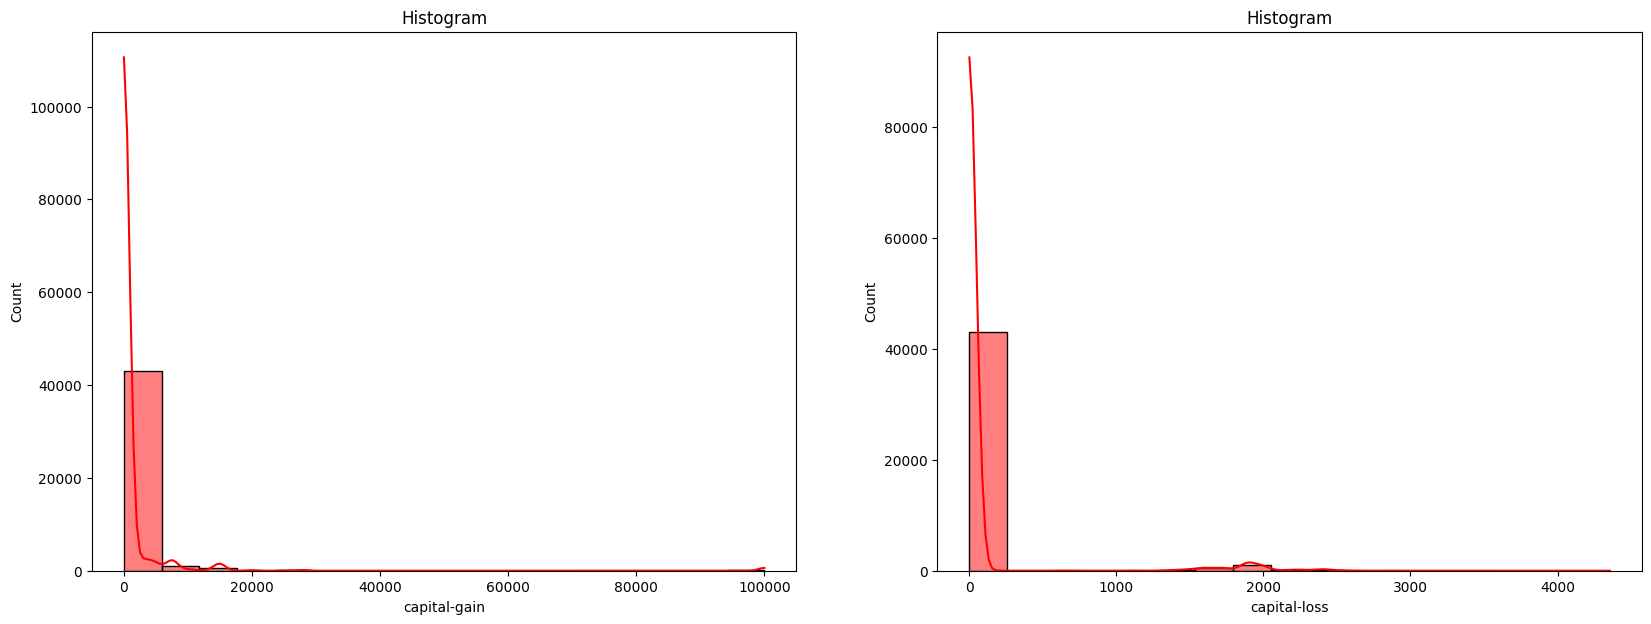

In [81]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
sns.histplot(df['capital-gain'], kde = True,color='r')
plt.title('Histogram')
plt.subplot(1, 2, 2)
sns.histplot(df['capital-loss'], kde = True,color='r')
plt.title('Histogram')

[ 'capital-gain' ] & [ 'capital-loss' ] both columns have 75% data as 0.00.
So, we can drop both [ 'capital-gain' ] & [ 'capital-loss' ] columns and [ 'educational-num' ] columns

In [82]:
df1 = df.drop(['educational-num', 'capital-gain', 'capital-loss'], axis=1)
df1

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
5,34,Private,198693,10th,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
48838,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
48839,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
48840,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


## Convert categorical cate to numerical using LableEncoder

In [83]:
from sklearn import preprocessing

In [84]:
label_encoder_gender = preprocessing.LabelEncoder()
df1['gender'] = label_encoder_gender.fit_transform(df1['gender'])
mapping = {encoded: original for encoded, original in enumerate(label_encoder_gender.classes_)}
print("Mapping von encodierten Labels zu ursprünglichen Strings:")
print(mapping)

label_encoder_workclass = preprocessing.LabelEncoder()
df1['workclass'] = label_encoder_workclass.fit_transform(df1['workclass'])
mapping = {encoded: original for encoded, original in enumerate(label_encoder_workclass.classes_)}
print("Mapping von encodierten Labels zu ursprünglichen Strings:")
print(mapping)

label_encoder_education = preprocessing.LabelEncoder()
df1['education'] = label_encoder_education.fit_transform(df1['education'])
mapping = {encoded: original for encoded, original in enumerate(label_encoder_education.classes_)}
print("Mapping von encodierten Labels zu ursprünglichen Strings:")
print(mapping)

label_encoder_marital_status = preprocessing.LabelEncoder()
df1['marital-status'] = label_encoder_marital_status.fit_transform(df1['marital-status'])
mapping = {encoded: original for encoded, original in enumerate(label_encoder_marital_status.classes_)}
print("Mapping von encodierten Labels zu ursprünglichen Strings:")
print(mapping)

label_encoder_occupation = preprocessing.LabelEncoder()
df1['occupation'] = label_encoder_occupation.fit_transform(df1['occupation'])
mapping = {encoded: original for encoded, original in enumerate(label_encoder_occupation.classes_)}
print("Mapping von encodierten Labels zu ursprünglichen Strings:")
print(mapping)

label_encoder_relationship = preprocessing.LabelEncoder()
df1['relationship'] = label_encoder_relationship.fit_transform(df1['relationship'])
mapping = {encoded: original for encoded, original in enumerate(label_encoder_relationship.classes_)}
print("Mapping von encodierten Labels zu ursprünglichen Strings:")
print(mapping)

label_encoder_race = preprocessing.LabelEncoder()
df1['race'] = label_encoder_race.fit_transform(df1['race'])
mapping = {encoded: original for encoded, original in enumerate(label_encoder_race.classes_)}
print("Mapping von encodierten Labels zu ursprünglichen Strings:")
print(mapping)

label_encoder_native_country = preprocessing.LabelEncoder()
df1['native-country'] = label_encoder_native_country.fit_transform(df1['native-country'])
mapping = {encoded: original for encoded, original in enumerate(label_encoder_native_country.classes_)}
print("Mapping von encodierten Labels zu ursprünglichen Strings:")
print(mapping)

label_encoder_income = preprocessing.LabelEncoder()
df1['income'] = label_encoder_income.fit_transform(df1['income'])
mapping = {encoded: original for encoded, original in enumerate(label_encoder_income.classes_)}
print("Mapping von encodierten Labels zu ursprünglichen Strings:")
print(mapping)


Mapping von encodierten Labels zu ursprünglichen Strings:
{0: 'Female', 1: 'Male'}
Mapping von encodierten Labels zu ursprünglichen Strings:
{0: 'Federal-gov', 1: 'Local-gov', 2: 'Private', 3: 'Self-emp-inc', 4: 'Self-emp-not-inc', 5: 'State-gov', 6: 'Without-pay'}
Mapping von encodierten Labels zu ursprünglichen Strings:
{0: '10th', 1: '11th', 2: '12th', 3: '1st-4th', 4: '5th-6th', 5: '7th-8th', 6: '9th', 7: 'Assoc-acdm', 8: 'Assoc-voc', 9: 'Bachelors', 10: 'Doctorate', 11: 'HS-grad', 12: 'Masters', 13: 'Preschool', 14: 'Prof-school', 15: 'Some-college'}
Mapping von encodierten Labels zu ursprünglichen Strings:
{0: 'Divorced', 1: 'Married-AF-spouse', 2: 'Married-civ-spouse', 3: 'Married-spouse-absent', 4: 'Never-married', 5: 'Separated', 6: 'Widowed'}
Mapping von encodierten Labels zu ursprünglichen Strings:
{0: 'Adm-clerical', 1: 'Armed-Forces', 2: 'Craft-repair', 3: 'Exec-managerial', 4: 'Farming-fishing', 5: 'Handlers-cleaners', 6: 'Machine-op-inspct', 7: 'Other-service', 8: 'Priv-

In [85]:
df1

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,2,226802,1,4,6,3,2,1,40,38,0
1,38,2,89814,11,2,4,0,4,1,50,38,0
2,28,1,336951,7,2,10,0,4,1,40,38,1
3,44,2,160323,15,2,6,0,2,1,40,38,1
5,34,2,198693,0,4,7,1,4,1,30,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,2,257302,7,2,12,5,4,0,38,38,0
48838,40,2,154374,11,2,6,0,4,1,40,38,1
48839,58,2,151910,11,6,0,4,4,0,40,38,0
48840,22,2,201490,11,4,0,3,4,1,20,38,0


### check again for unsuable data points

In [86]:
# Check For Missing Values
info = pd.DataFrame(df1.isnull().sum(),columns=["IsNull"])
info.insert(1,"IsNa",df1.isna().sum(),True)
info.insert(2,"Duplicate",df1.duplicated().sum(),True)
info.insert(3,"Unique",df1.nunique(),True)
info.insert(4,"Min",df1.min(),True)
info.insert(5,"Max",df1.max(),True)
info.T    


,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
IsNull,0,0,0,0,0,0,0,0,0,0,0,0
IsNa,0,0,0,0,0,0,0,0,0,0,0,0
Duplicate,8,8,8,8,8,8,8,8,8,8,8,8
Unique,74,7,26741,16,7,14,6,5,2,96,41,2
Min,17,0,13492,0,0,0,0,0,0,1,0,0
Max,90,6,1490400,15,6,13,5,4,1,99,40,1


In [87]:
df1 = df1.drop_duplicates()

In [88]:
# Check For Missing Values
info = pd.DataFrame(df1.isnull().sum(),columns=["IsNull"])
info.insert(1,"IsNa",df1.isna().sum(),True)
info.insert(2,"Duplicate",df1.duplicated().sum(),True)
info.insert(3,"Unique",df1.nunique(),True)
info.insert(4,"Min",df1.min(),True)
info.insert(5,"Max",df1.max(),True)
info.T 

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
IsNull,0,0,0,0,0,0,0,0,0,0,0,0
IsNa,0,0,0,0,0,0,0,0,0,0,0,0
Duplicate,0,0,0,0,0,0,0,0,0,0,0,0
Unique,74,7,26741,16,7,14,6,5,2,96,41,2
Min,17,0,13492,0,0,0,0,0,0,1,0,0
Max,90,6,1490400,15,6,13,5,4,1,99,40,1


### print Correlation Matrix

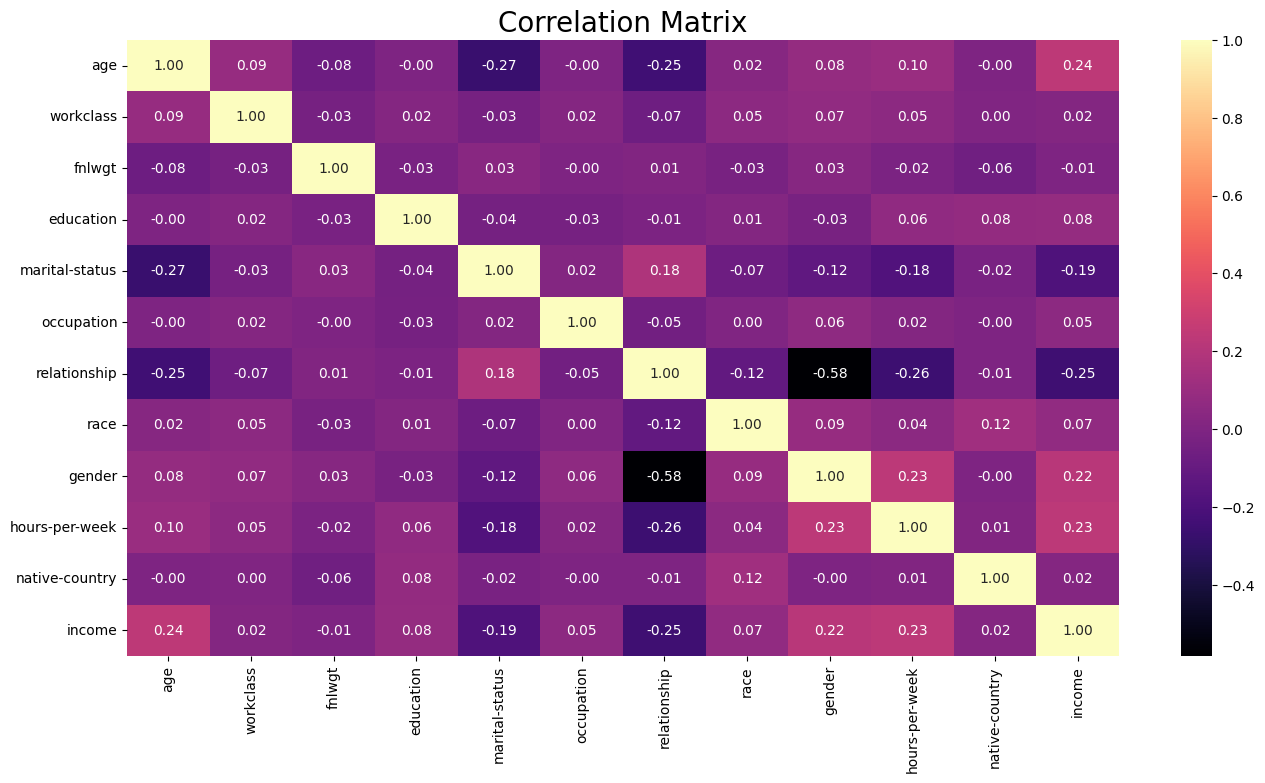

In [89]:
# Correlation matrix
f, ax = plt.subplots(figsize=[16, 8])
sns.heatmap(df1.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [90]:
def diagnostic_plots(df, variable,target):
    # The function takes a dataframe (df) and
    # the variable of interest as arguments.

    # Define figure size.
    plt.figure(figsize=(20, 7))

    # histogram
    plt.subplot(1, 4, 1)
    sns.histplot(df[variable], kde = True,color='r')
    plt.title('Histogram')


    # scatterplot
    plt.subplot(1, 4, 2)
    plt.scatter(df[variable],df[target],color = 'g')
    plt.title('Scatterplot')
    
    
    # boxplot
    plt.subplot(1, 4, 3)
    sns.boxplot(y=df[variable],color = 'b')
    plt.title('Boxplot')
    
    # barplot
    plt.subplot(1, 4, 4)
    sns.barplot(x = target, y = variable, data = df)   
    plt.title('Barplot')
    
    
    plt.show()

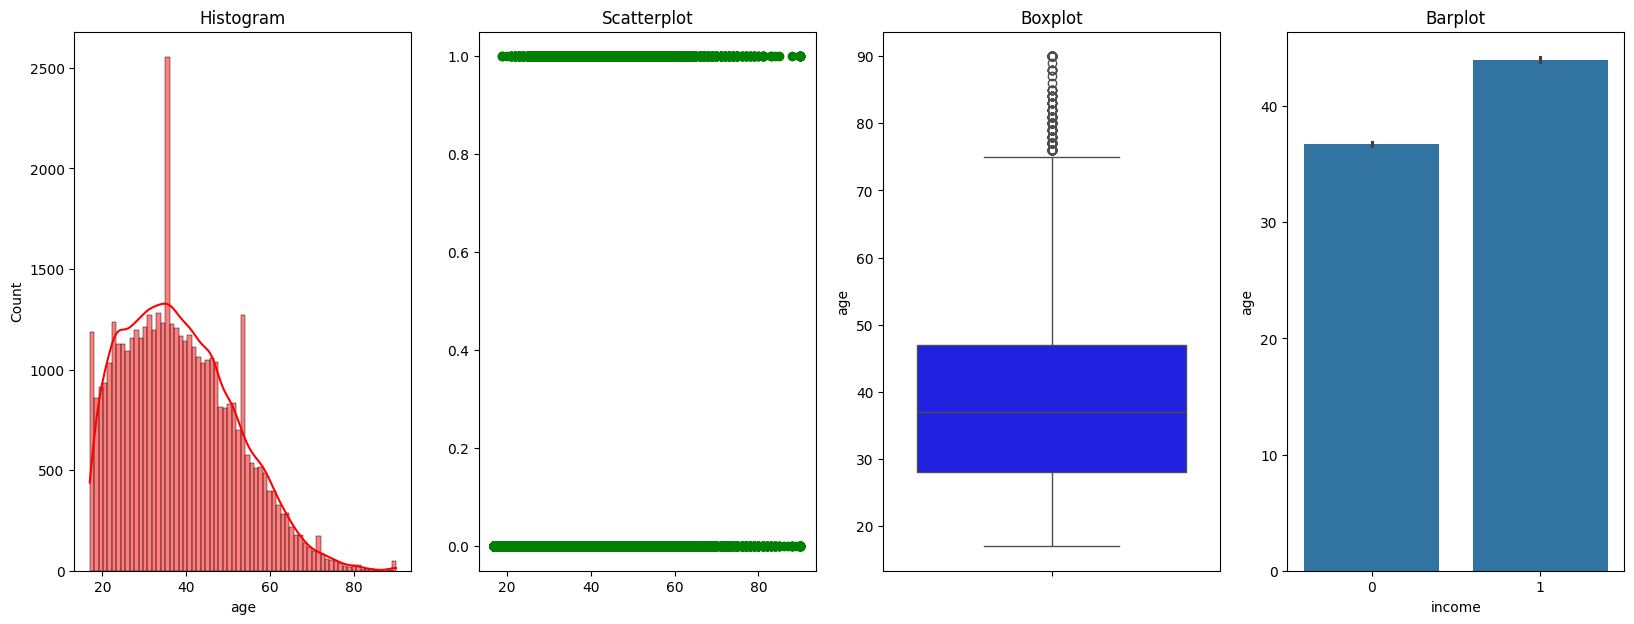

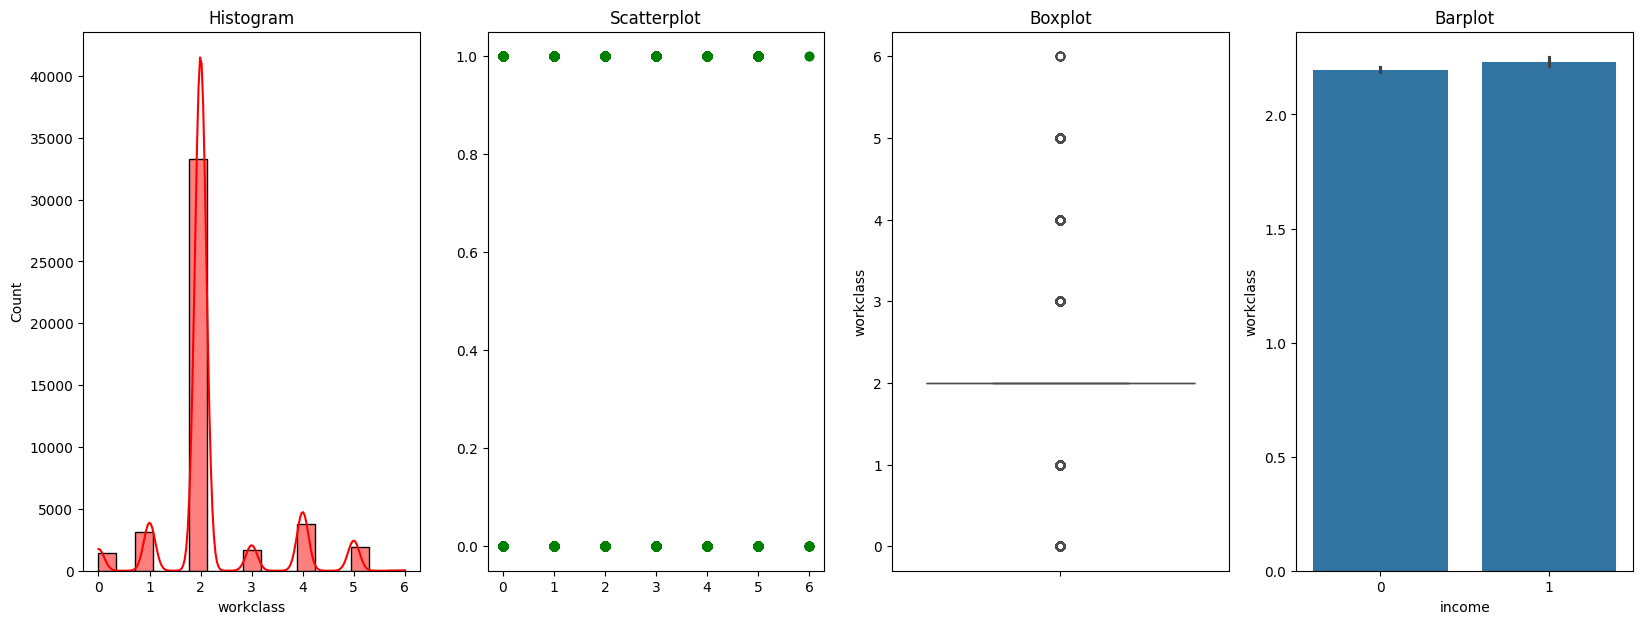

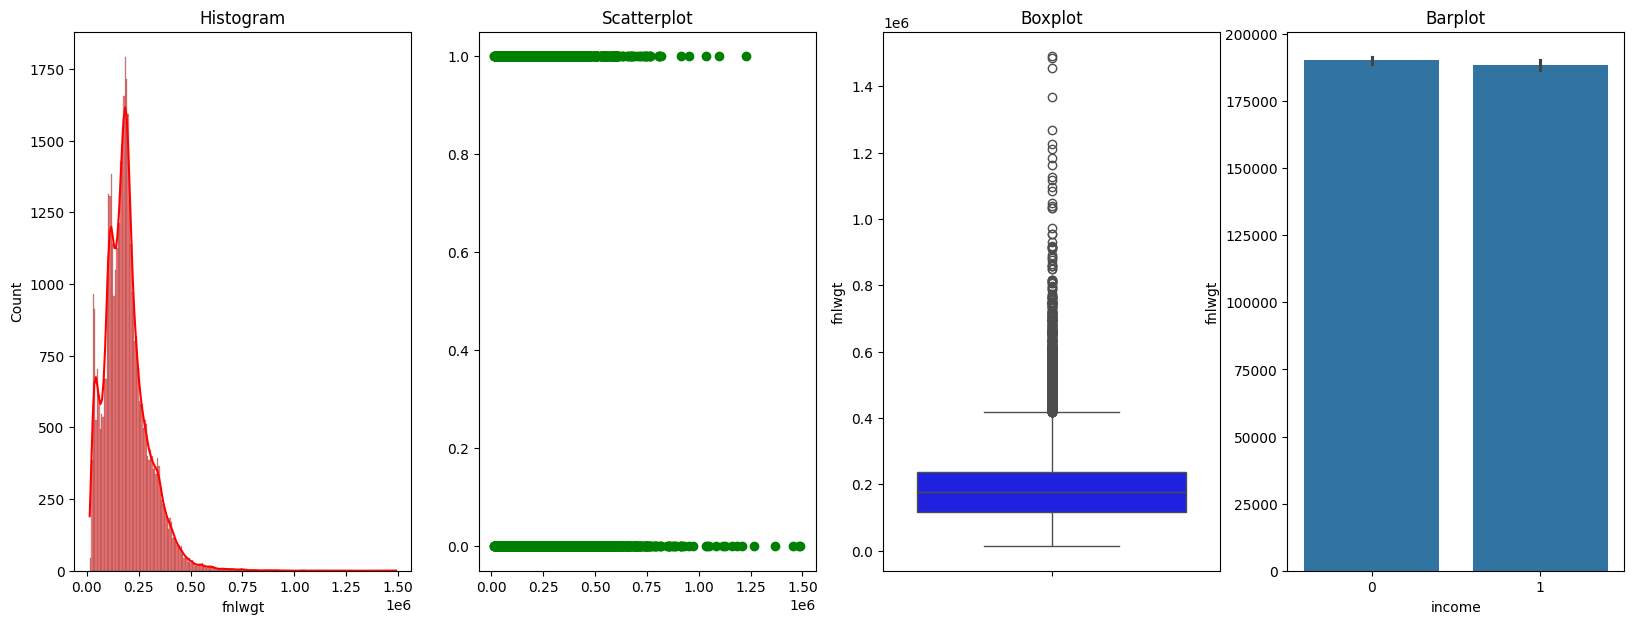

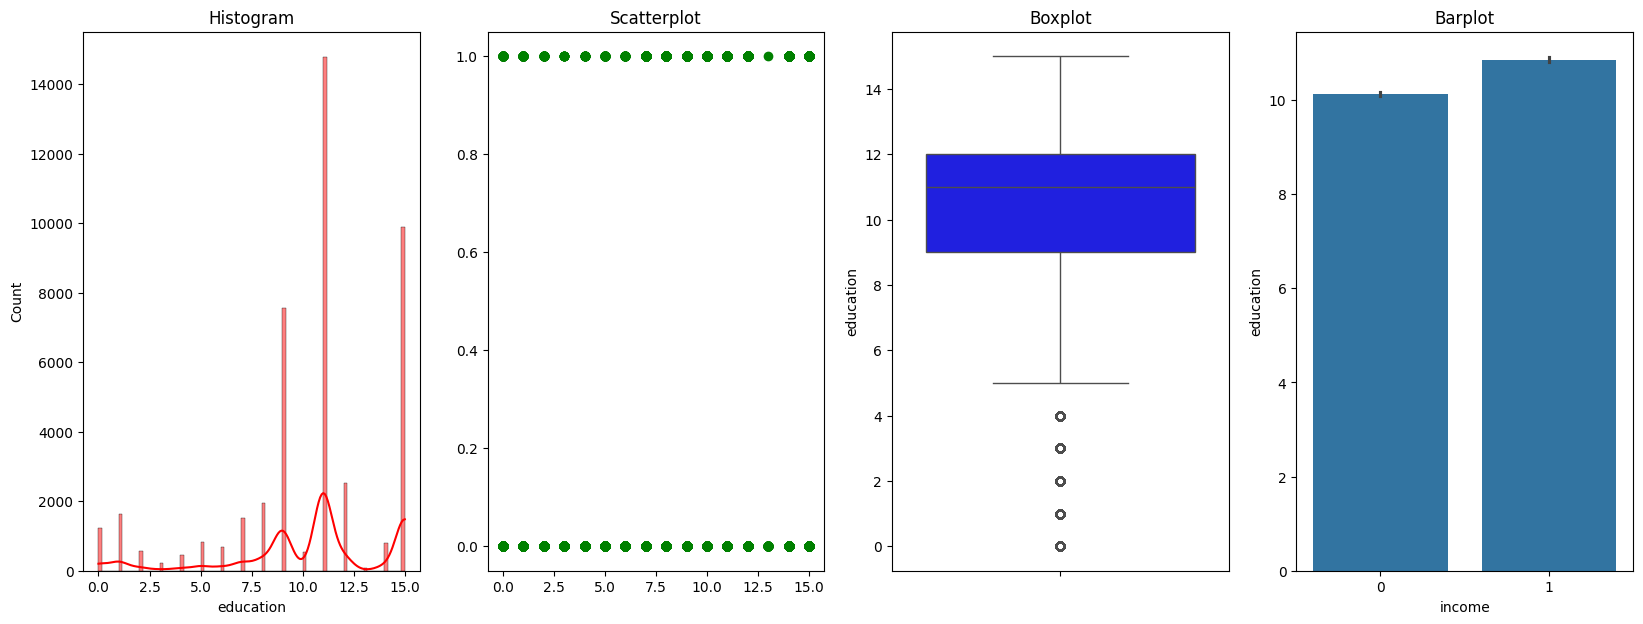

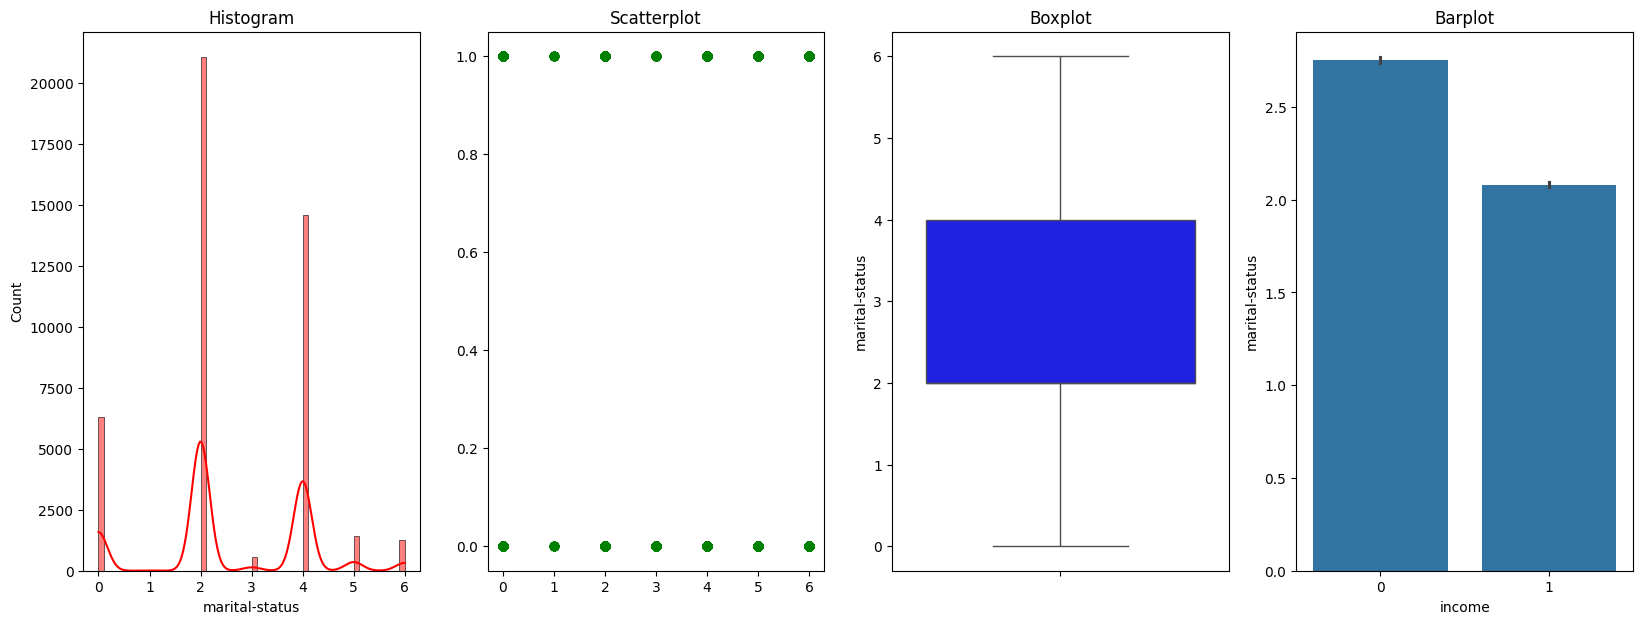

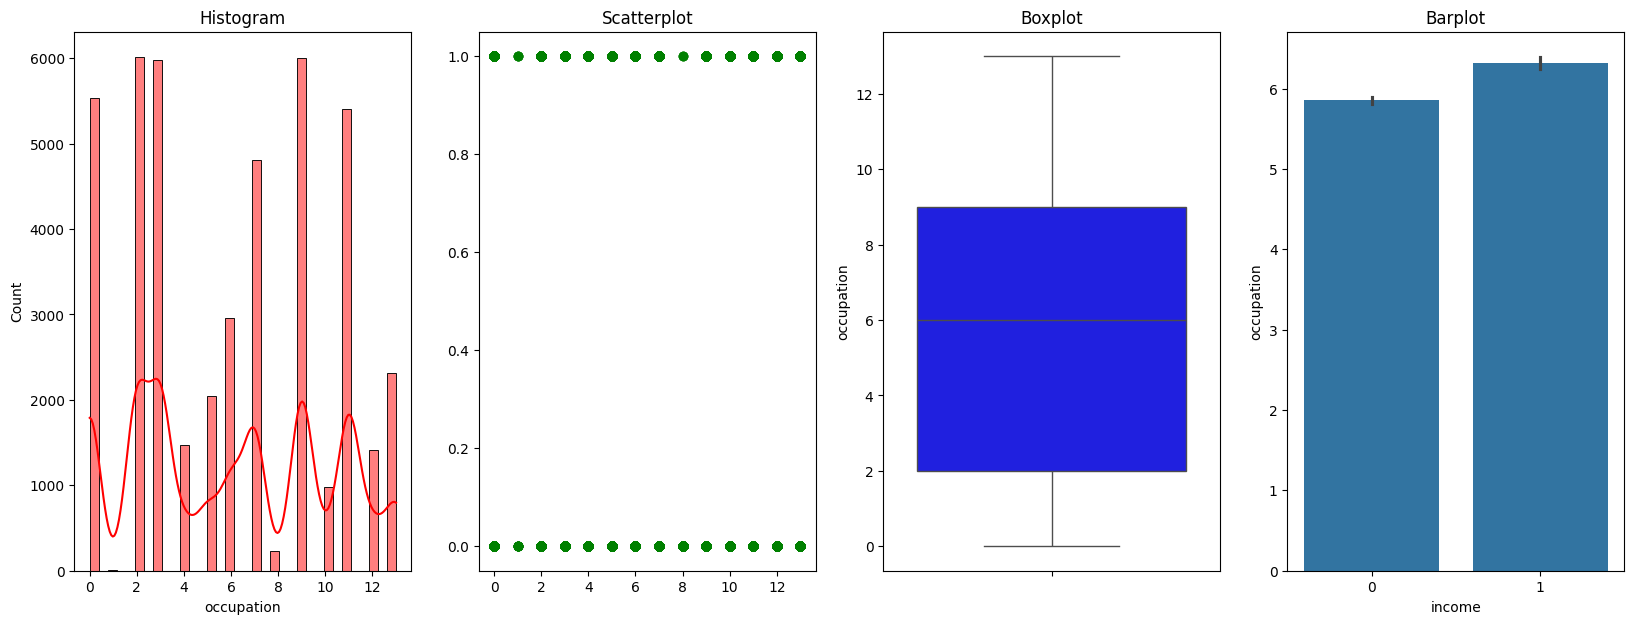

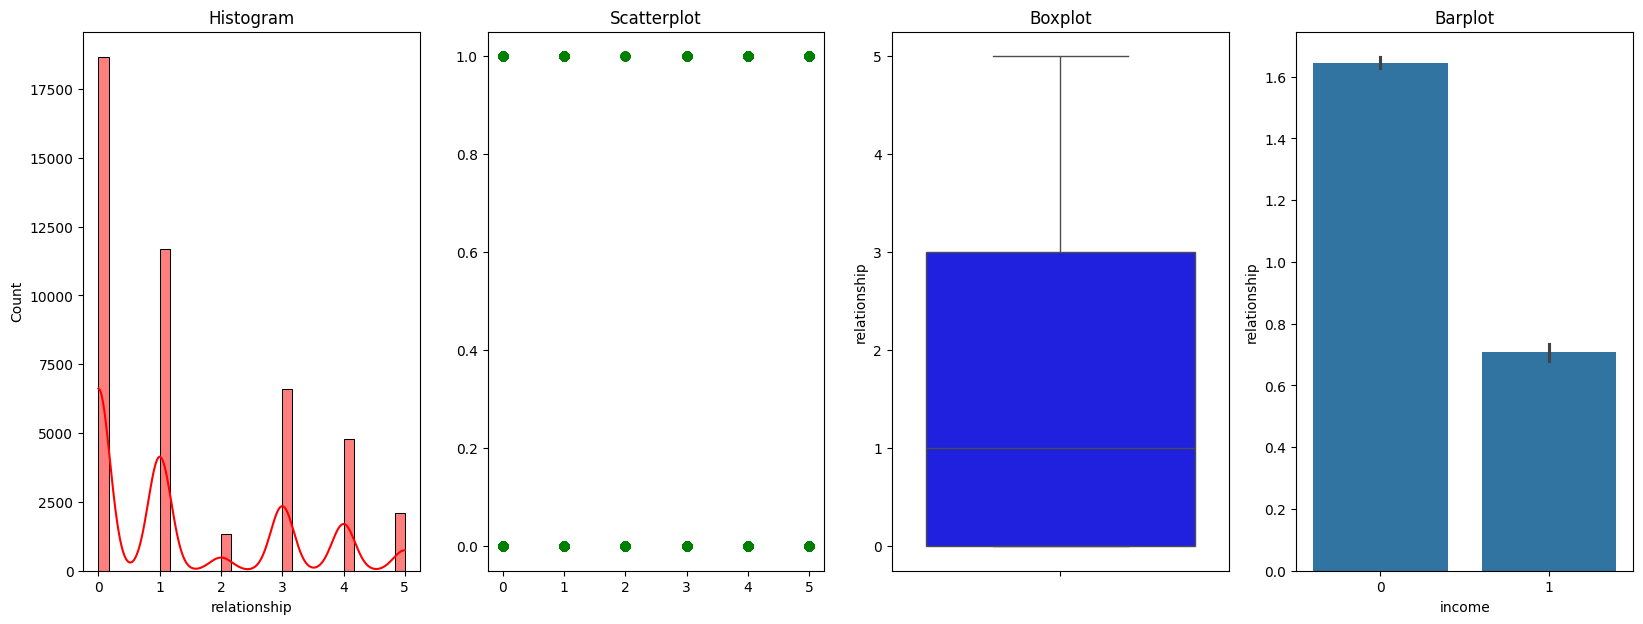

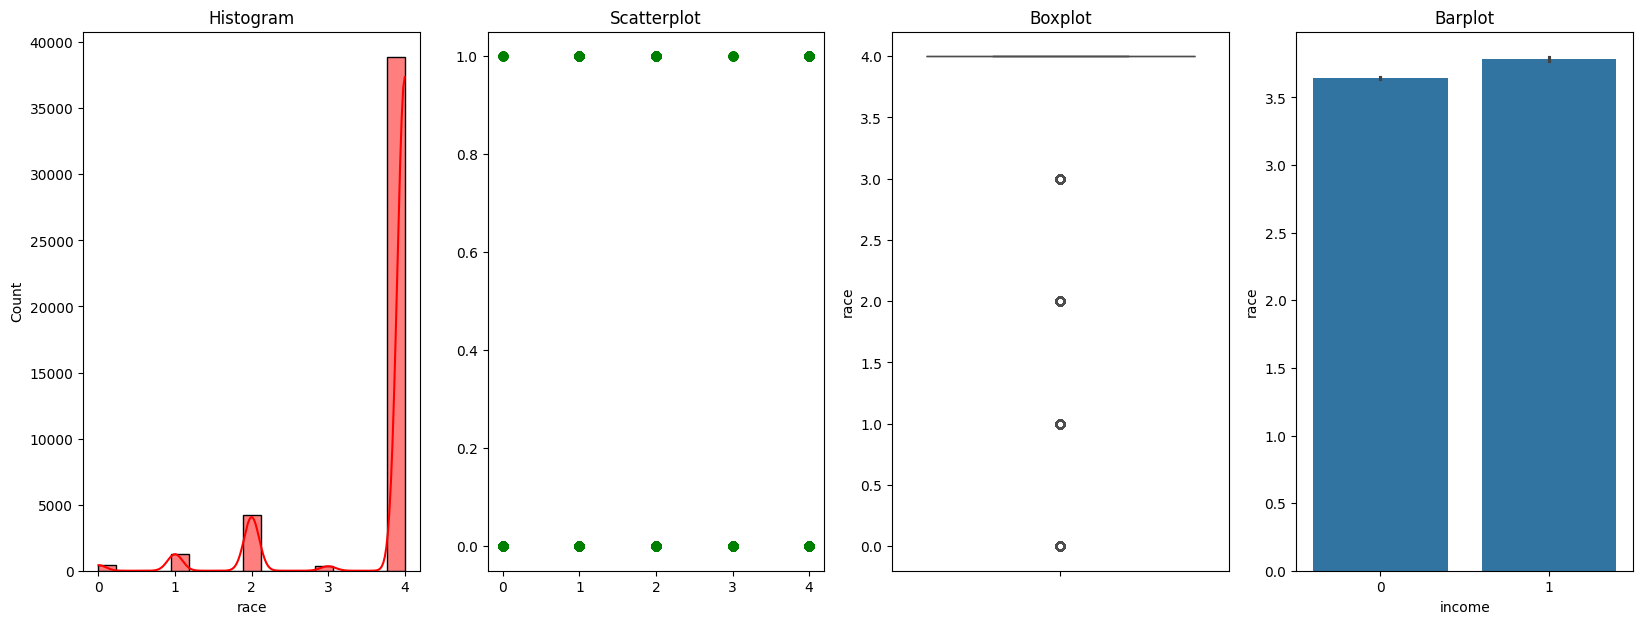

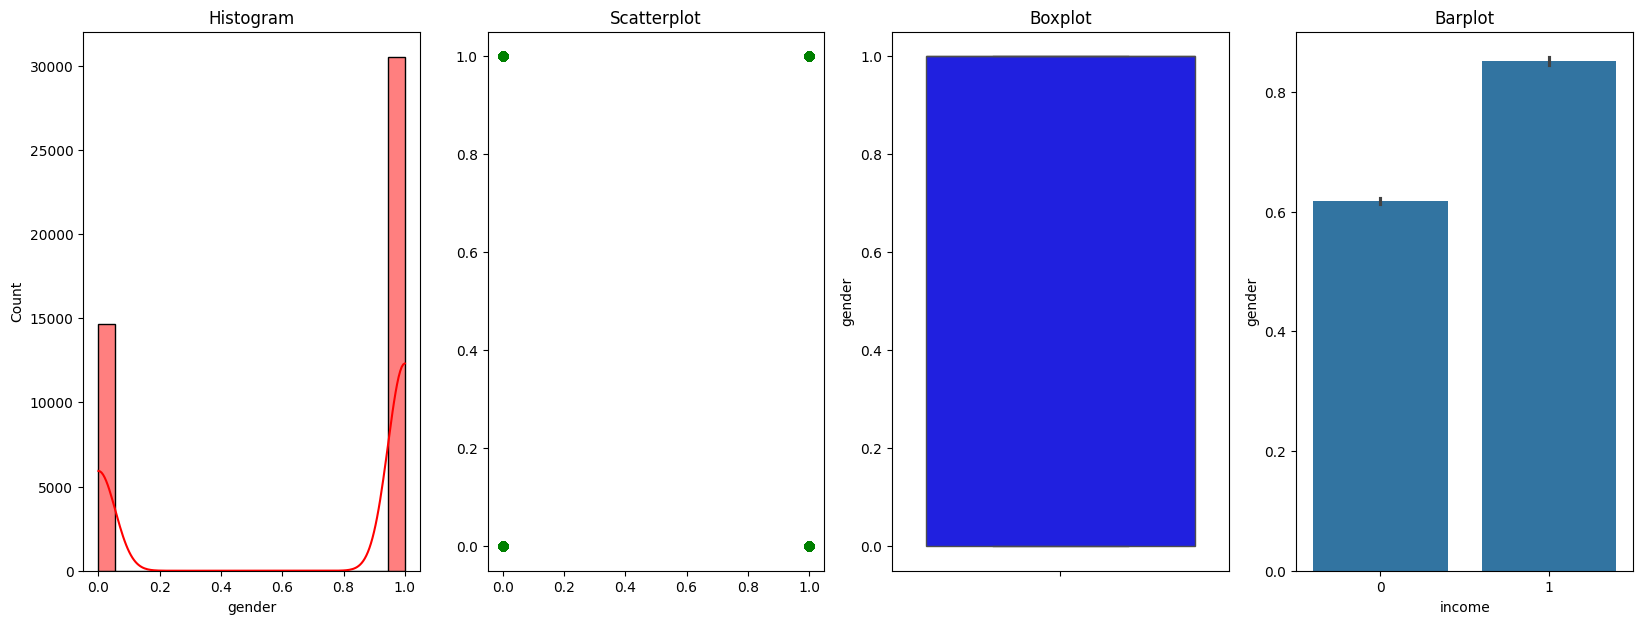

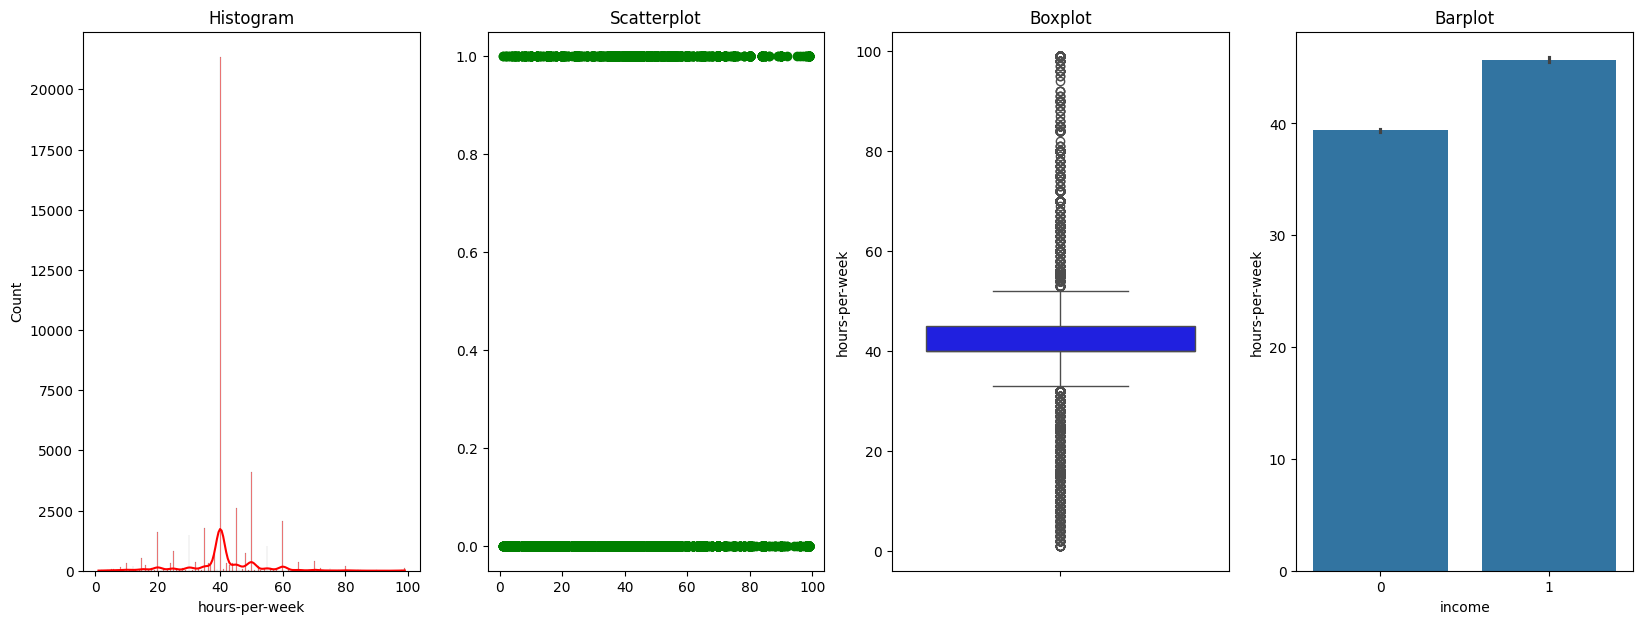

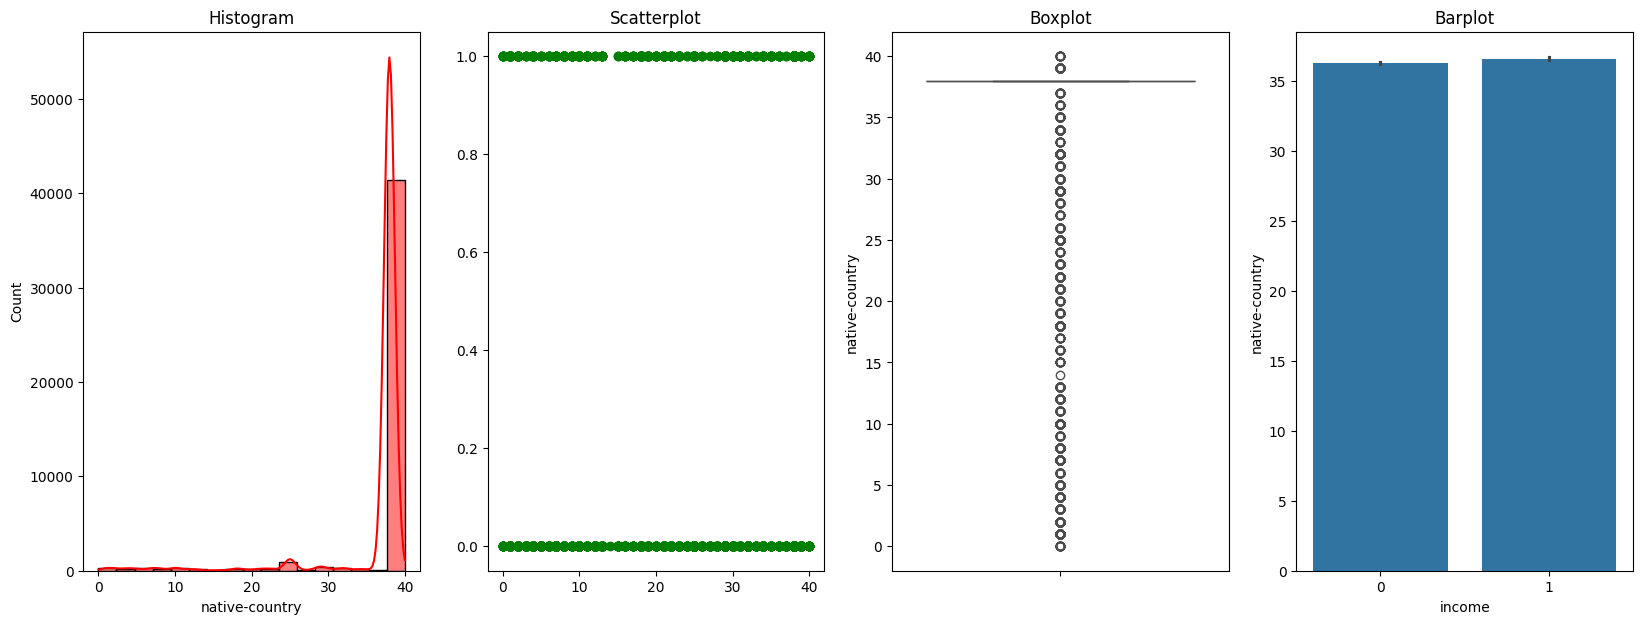

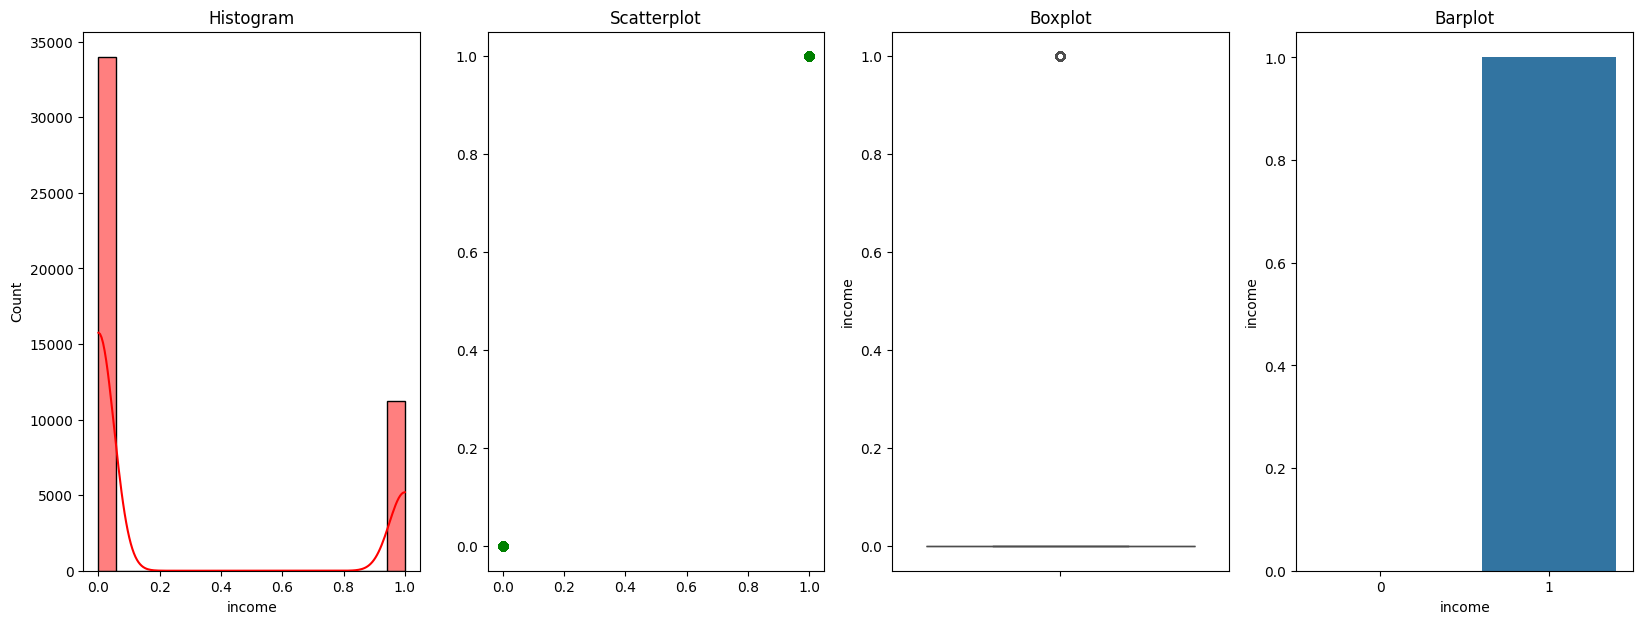

In [91]:
for col in df1:
    diagnostic_plots(df1,col,'income')

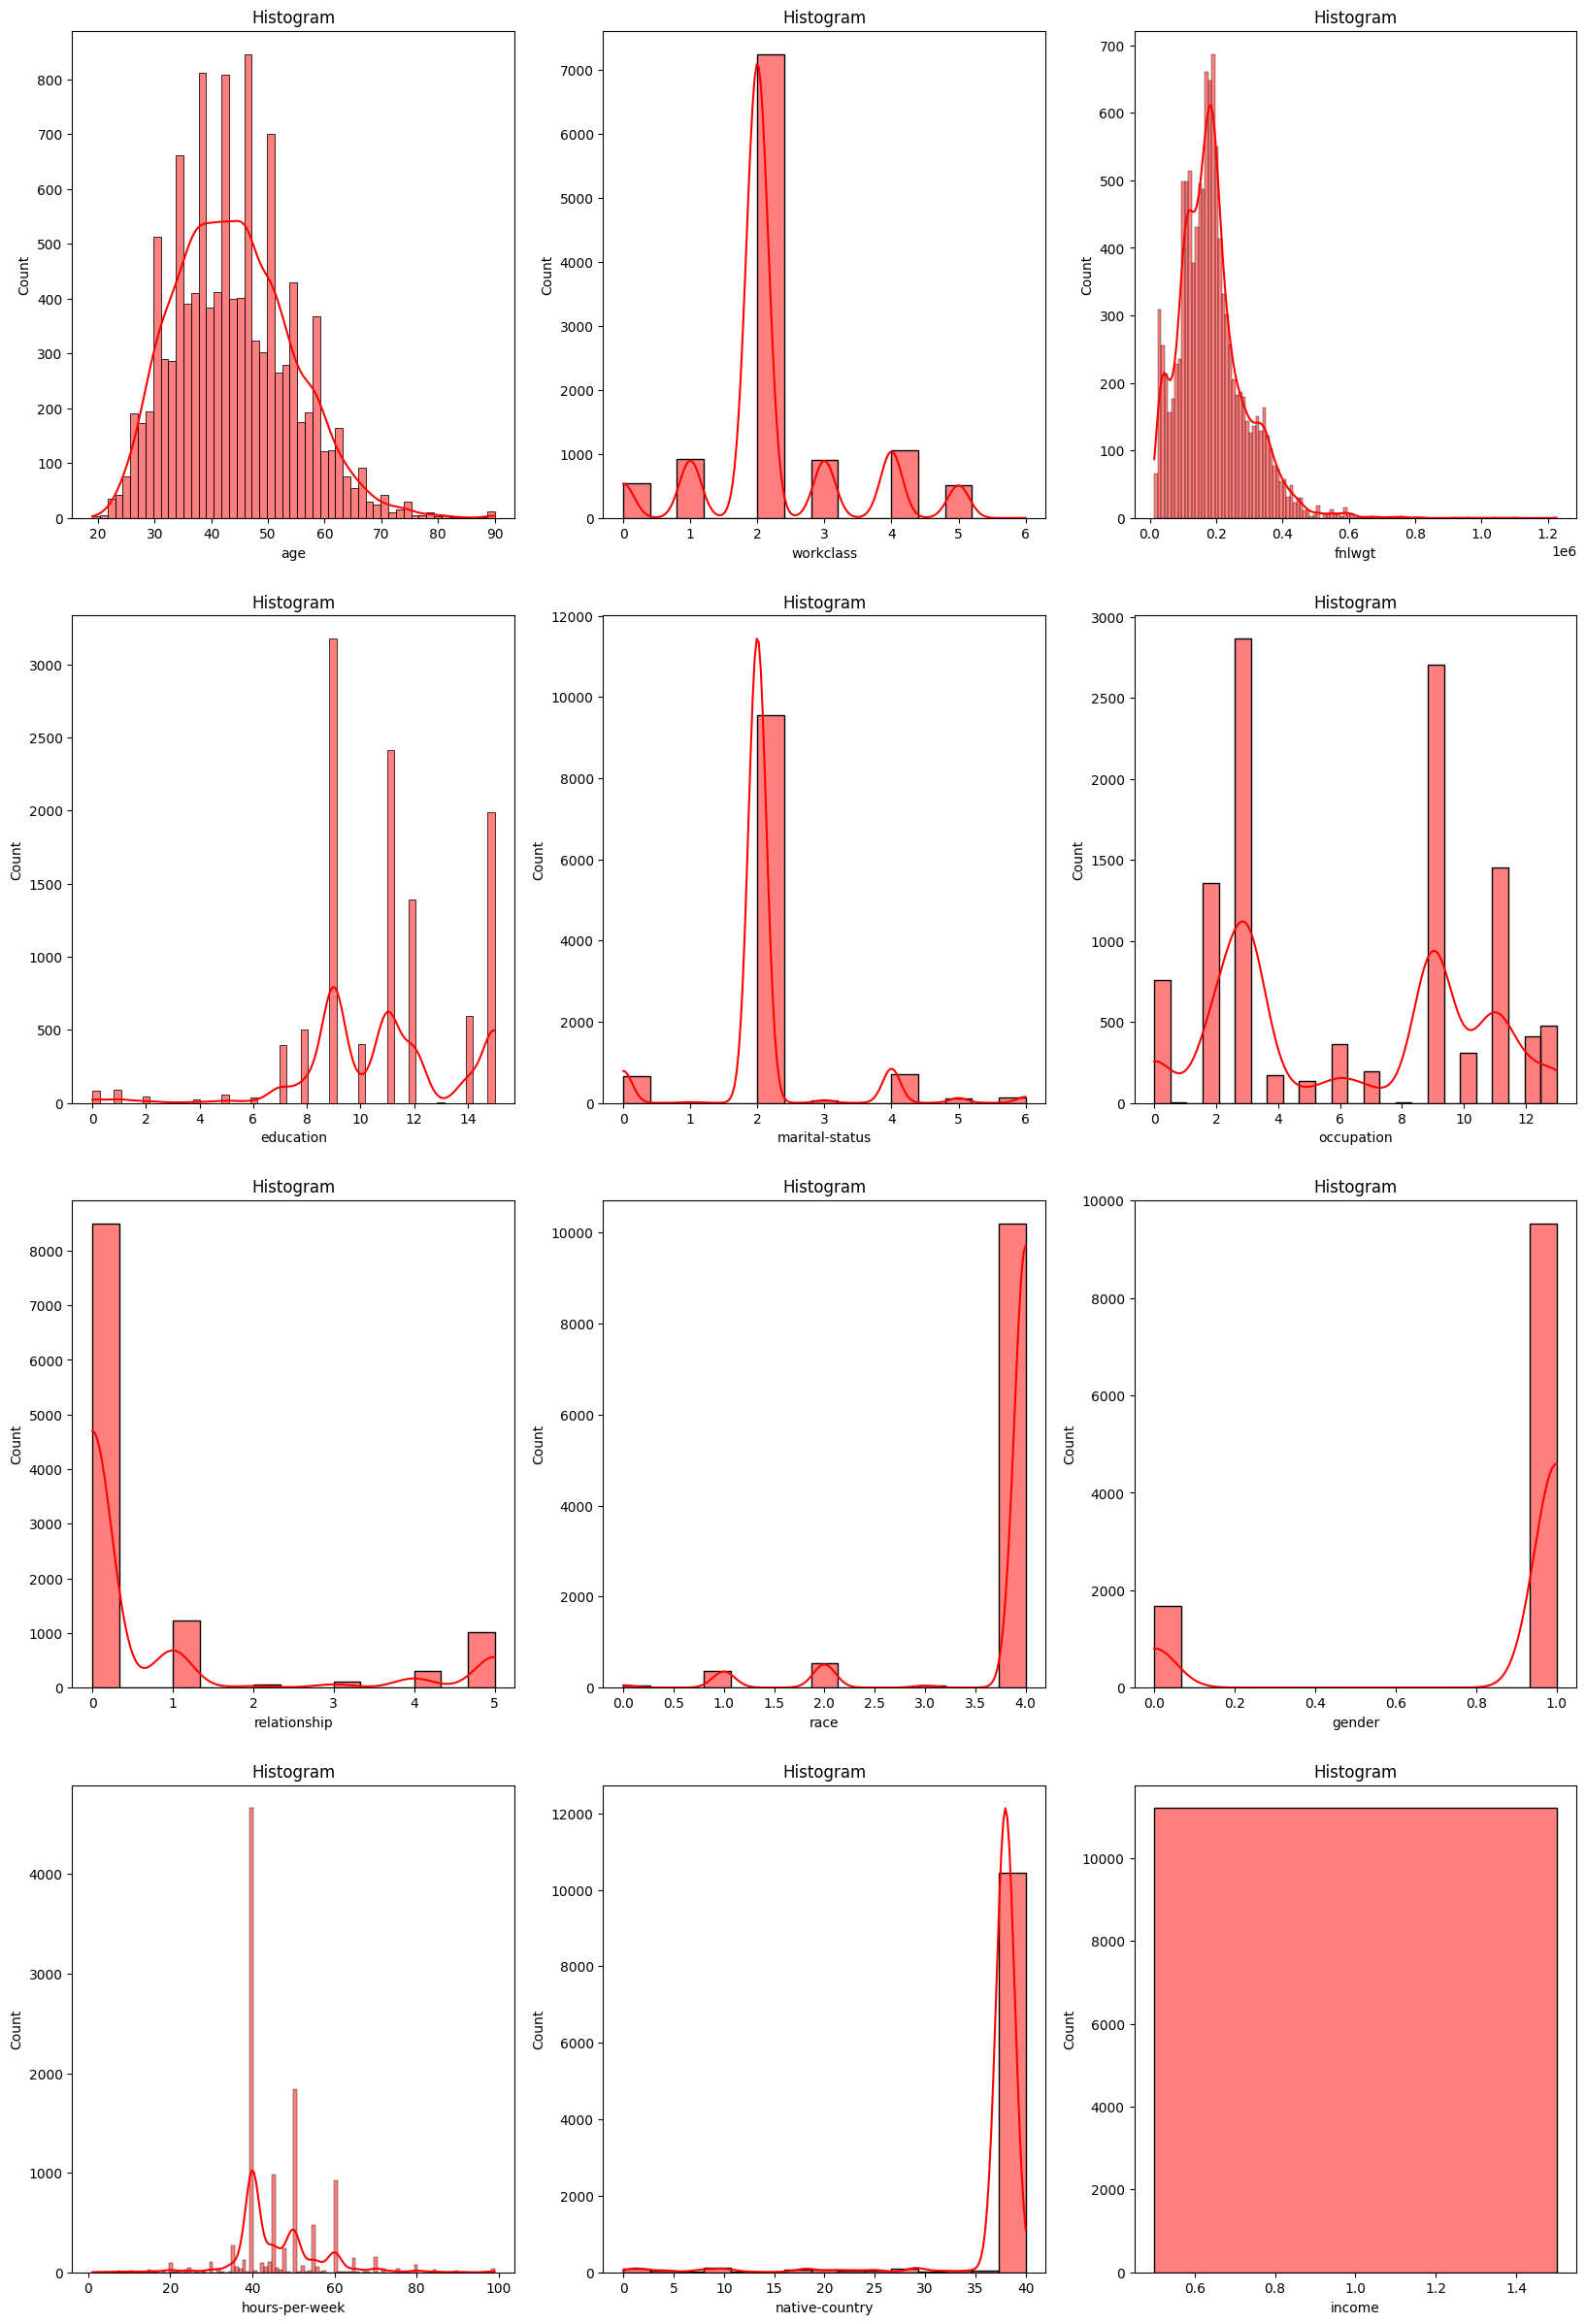

In [92]:
df_income_gt_50k = df1[df1['income'] == 1]
i = 1
plt.figure(figsize=(20, 30))
for col in df_income_gt_50k:
    # histogram
    plt.subplot(4, 3, i)
    i += 1
    sns.histplot(df_income_gt_50k[col], kde = True,color='r')
    plt.title('Histogram')

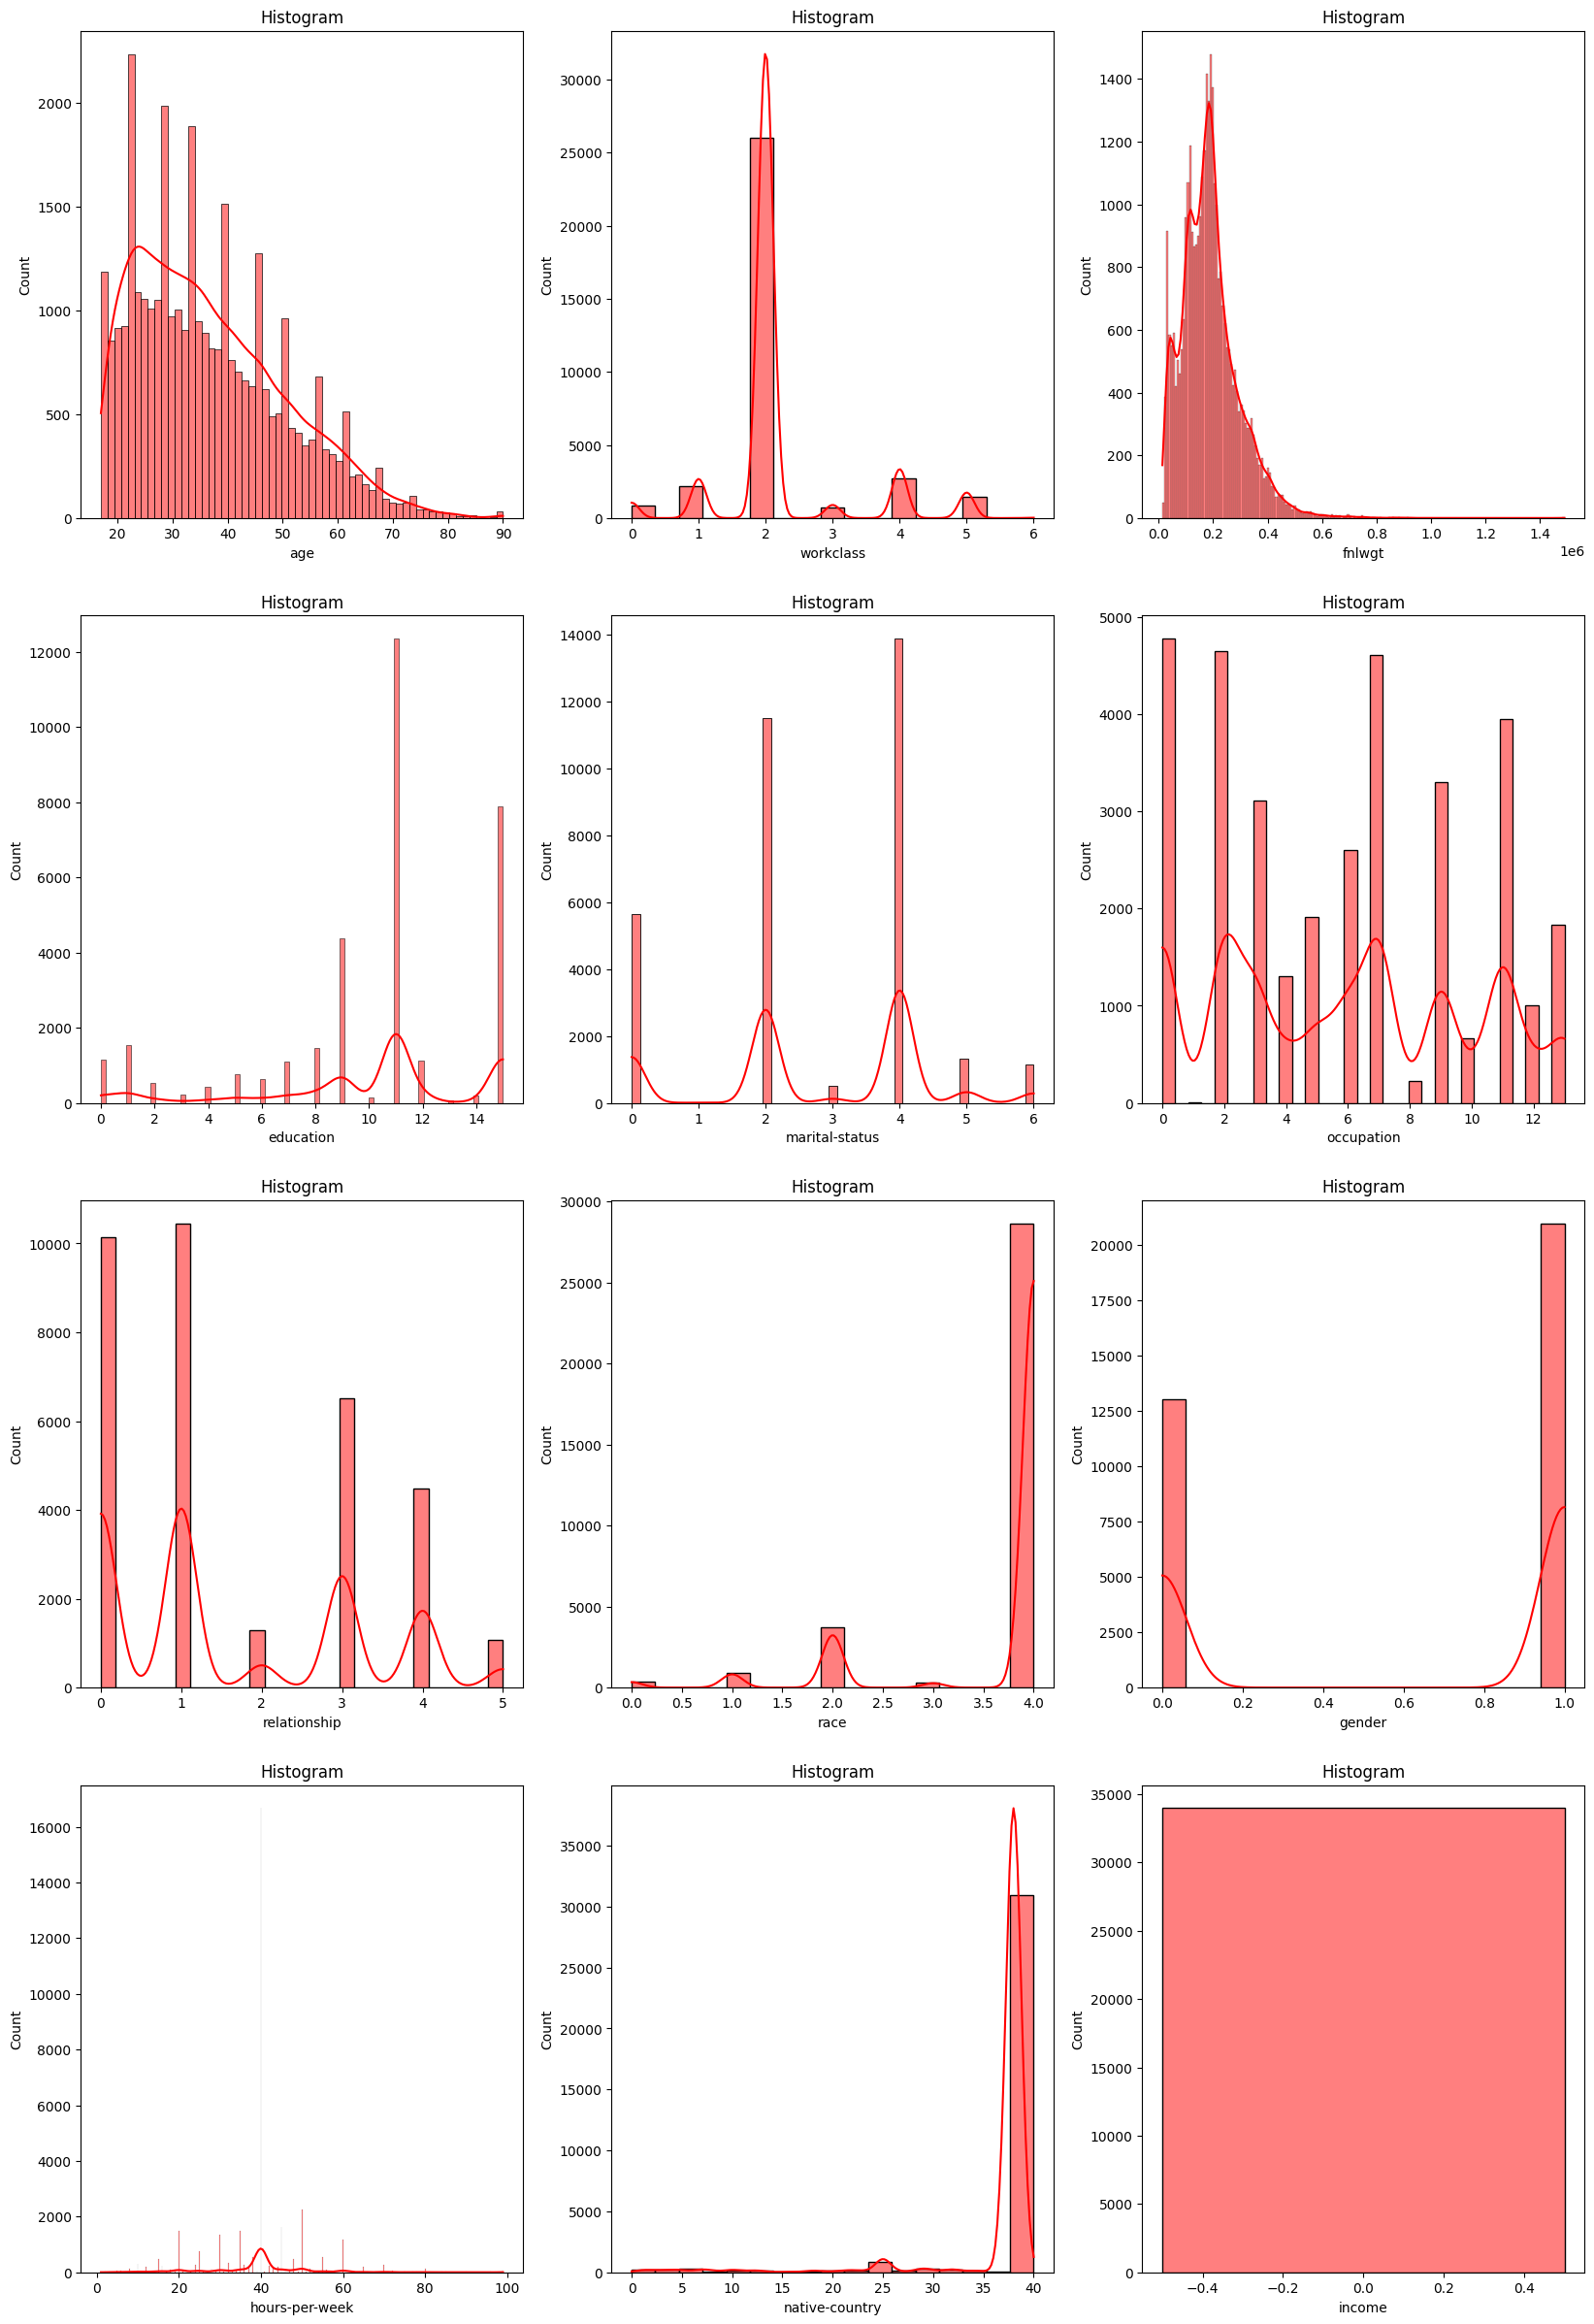

In [93]:
df_income_le_50k = df1[df1['income'] == 0]
i = 1
plt.figure(figsize=(20, 30))
for col in df_income_le_50k:
    # histogram
    plt.subplot(4, 3, i)
    i += 1
    sns.histplot(df_income_le_50k[col], kde = True,color='r')
    plt.title('Histogram')

# Model training

In [94]:
from sklearn.model_selection import train_test_split
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 
from sklearn import metrics

In [95]:
# split Data
X = df1.drop(columns={"income"},axis=1)
y =df1["income"].values.reshape(-1,1) #target

In [96]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (36133, 11)
y_train shape: (36133, 1)
X_test shape: (9034, 11)
y_test shape: (9034, 1)


### Scaling Data

In [97]:
from sklearn.preprocessing import MinMaxScaler

st =MinMaxScaler()
X_train = st.fit_transform(X_train)
X_test = st.fit_transform(X_test)

In [98]:
info = pd.DataFrame(df1.isnull().sum(),columns=["IsNull"])
info.insert(1,"IsNa",df1.isna().sum(),True)
info.insert(2,"Duplicate",df1.duplicated().sum(),True)
info.insert(3,"Unique",df1.nunique(),True)
info.insert(4,"Min",df1.min(),True)
info.insert(5,"Max",df1.max(),True)
info.T

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
IsNull,0,0,0,0,0,0,0,0,0,0,0,0
IsNa,0,0,0,0,0,0,0,0,0,0,0,0
Duplicate,0,0,0,0,0,0,0,0,0,0,0,0
Unique,74,7,26741,16,7,14,6,5,2,96,41,2
Min,17,0,13492,0,0,0,0,0,0,1,0,0
Max,90,6,1490400,15,6,13,5,4,1,99,40,1


## Hyperparameter search for K

### find best K without cross validation

In [99]:
# Find Best K 
K = 30
error =[]
accuracy=[]
for i in range(1,K+1):
    knn= KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train,y_train)
    y_pred =knn.predict(X_test)
    error.append(1-metrics.accuracy_score(y_test,y_pred))
    accuracy.append(metrics.accuracy_score(y_test,y_pred))


### Plot course of K accuracy error

Text(0.5, 1.0, 'accuracy vs K')

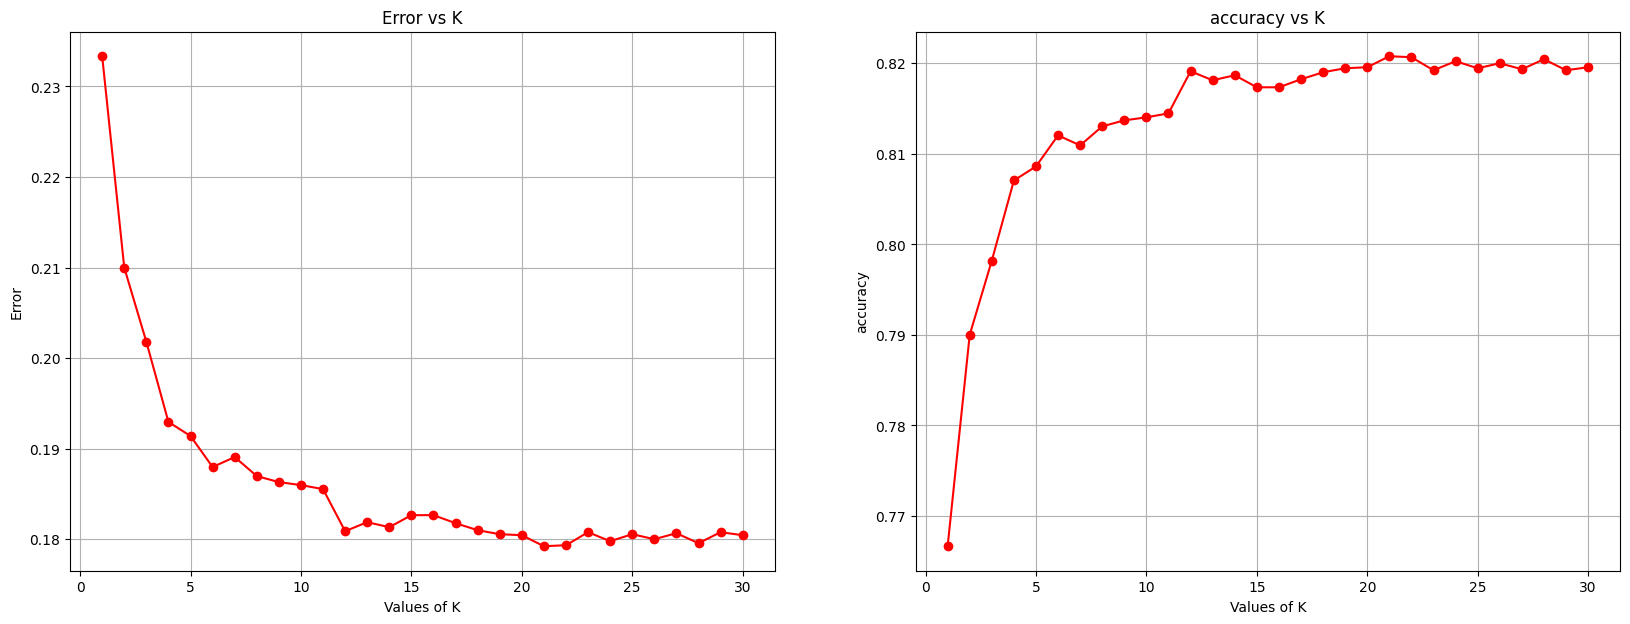

In [102]:

plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
plt.plot(range(1,31),error,'r-',marker='o')
plt.xlabel('Values of K')
plt.ylabel('Error')
plt.grid()
plt.title('Error vs K')

plt.subplot(1, 2, 2)
plt.plot(range(1,31),accuracy,'r-',marker='o')
plt.xlabel('Values of K')
plt.ylabel('accuracy')
plt.grid()
plt.title('accuracy vs K')

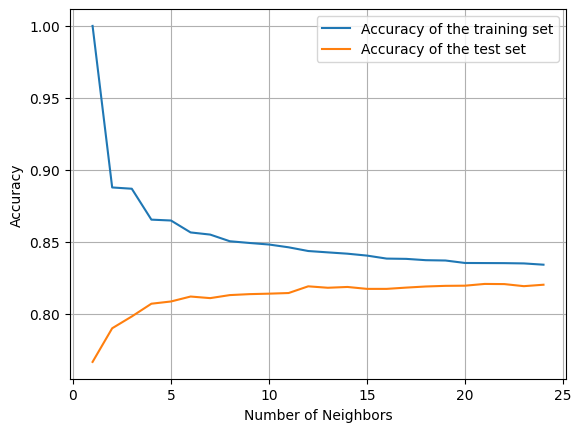

In [ ]:
# Find Best K 
training_acc = []
test_acc = []

# try KNN for different K nearest neighbor from 1 to 30
neighbors_setting = range(1,31)
for n_neighbors in neighbors_setting:
    knn= KNeighborsClassifier(n_neighbors= n_neighbors, )
    knn.fit(X_train,y_train.ravel())
    training_acc.append(knn.score(X_train,y_train))
    test_acc.append(knn.score(X_test,y_test))

plt.plot(neighbors_setting,training_acc,label='Accuracy of the training set')
plt.plot(neighbors_setting,test_acc,label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.grid()
plt.legend()
plt.show()

### find best K with cross validation

In [104]:
# Find Best K 

parameters = {"n_neighbors":range(1,31)}
grid_kn=GridSearchCV(estimator=knn,#model
                     param_grid=parameters, #range of K
                    scoring='accuracy',# Strategy to evaluate the performance of the cross-validation model on the test set.
                    cv= 10, # Cross-validation generator
                    verbose= 1, #Time to calculate
                    n_jobs= -1 #Help to cpu
                    )
grid_kn.fit(X_train,y_train.ravel())
grid_kn.best_params_

Fitting 10 folds for each of 30 candidates, totalling 300 fits


{'n_neighbors': 26}

### Train Model with found Hyperparameter K

In [105]:
K=grid_kn.best_params_['n_neighbors']
model=KNeighborsClassifier(K)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Accuracy :" ,metrics.accuracy_score(y_test,y_pred))

Accuracy : 0.8200132831525349


## Create new Datapoint

In [106]:
example_point = pd.DataFrame({
    'age': [42],  # Alter
    'workclass': [2],  # Kodiert wie in den Trainingsdaten -> 2 = Private
    'fnlwgt': [220000],  # Gewichtungsfaktor
    'education': [9],  # Kodiert wie in den Trainingsdaten -> 9 = Bachelors
    'marital-status': [2],  # Kodiert wie in den Trainingsdaten -> 2 = Married-civ-spouse
    'occupation': [3],  # Kodiert wie in den Trainingsdaten -> 3 = Exec-managerial
    'relationship': [0],  # Kodiert wie in den Trainingsdaten -> 0 = Husband
    'race': [4],  # Kodiert wie in den Trainingsdaten -> 4 = White
    'gender': [1],  # Kodiert wie in den Trainingsdaten -> 1 = Male
    'hours-per-week': [40],  # Arbeitsstunden pro Woche
    'native-country': [38]  # Kodiert wie in den Trainingsdaten -> 38 = USA
})

# Skalieren der Eingabedaten
person_scaled = st.transform(example_point)

# Vorhersage mit dem Modell
prediction = model.predict(person_scaled)
print("Vorhersage für die neue Person:", prediction)

Vorhersage für die neue Person: [1]


# Nearest Neighbor Analysis

In [107]:
# Skalieren des Datenpunkts
example_point_scaled = st.transform(example_point)

# Nächste Nachbarn finden
distances, indices = model.kneighbors(example_point_scaled)

# Ergebnisse anzeigen
print("Distanzen zu den nächsten Nachbarn:", distances)
print("Indizes der nächsten Nachbarn:", indices)

# Merkmale und Labels der nächsten Nachbarn anzeigen
nearest_neighbors = X_train[indices[0]]
nearest_labels = y_train[indices[0]]

Distanzen zu den nächsten Nachbarn: [[0.00753208 0.01734151 0.02006409 0.0317645  0.03338719 0.03910896
  0.04135332 0.04148888 0.04167788 0.04196273 0.04235823 0.04427616
  0.04655758 0.04728728 0.04843533 0.048993   0.04940154 0.05225567
  0.05599659 0.05840192 0.05895667 0.06098441 0.06185613 0.0626806
  0.06510084 0.06676909]]
Indizes der nächsten Nachbarn: [[26159  7409  1605  3328 32435 35127 28324 25928  2322  7654 21917 18337
   4603 22551  5195 27485 14881 32650 29216  7898  6766 23447 20210 12257
   8036  7102]]


In [108]:
nearest_neighbors = st.inverse_transform(nearest_neighbors)  # Rücktransformation der Merkmale
nearest_labels = label_encoder_income.inverse_transform(nearest_labels.ravel())  # Rücktransformation der Labels

# round so no float issues exist
nearest_neighbors = np.round(nearest_neighbors).astype(int)

In [109]:
# Rücktransformation der kodierten Werte in die ursprünglichen Werte
nearest_neighbors_df = pd.DataFrame(nearest_neighbors, columns=X.columns)

# Mapping für die Rücktransformation
mappings = {
    'gender' : {i: label for i, label in enumerate(label_encoder_gender.classes_)},
    'workclass': {i: label for i, label in enumerate(label_encoder_workclass.classes_)},
    'education': {i: label for i, label in enumerate(label_encoder_education.classes_)},
    'marital-status': {i: label for i, label in enumerate(label_encoder_marital_status.classes_)},
    'occupation': {i: label for i, label in enumerate(label_encoder_occupation.classes_)},
    'relationship': {i: label for i, label in enumerate(label_encoder_relationship.classes_)},
    'race': {i: label for i, label in enumerate(label_encoder_race.classes_)},
    'native-country': {i: label for i, label in enumerate(label_encoder_native_country.classes_)}
}

print("Mappings für die Rücktransformation:")
for column, mapping in mappings.items():
    print(f"{column}: {mapping}")

for column, mapping in mappings.items():
    nearest_neighbors_df[column] = nearest_neighbors_df[column].apply(lambda x: mapping.get(x, f"Unknown ({x})"))

nearest_neighbors_df['income'] = nearest_labels  # Hinzufügen der Labels

Mappings für die Rücktransformation:
gender: {0: 'Female', 1: 'Male'}
workclass: {0: 'Federal-gov', 1: 'Local-gov', 2: 'Private', 3: 'Self-emp-inc', 4: 'Self-emp-not-inc', 5: 'State-gov', 6: 'Without-pay'}
education: {0: '10th', 1: '11th', 2: '12th', 3: '1st-4th', 4: '5th-6th', 5: '7th-8th', 6: '9th', 7: 'Assoc-acdm', 8: 'Assoc-voc', 9: 'Bachelors', 10: 'Doctorate', 11: 'HS-grad', 12: 'Masters', 13: 'Preschool', 14: 'Prof-school', 15: 'Some-college'}
marital-status: {0: 'Divorced', 1: 'Married-AF-spouse', 2: 'Married-civ-spouse', 3: 'Married-spouse-absent', 4: 'Never-married', 5: 'Separated', 6: 'Widowed'}
occupation: {0: 'Adm-clerical', 1: 'Armed-Forces', 2: 'Craft-repair', 3: 'Exec-managerial', 4: 'Farming-fishing', 5: 'Handlers-cleaners', 6: 'Machine-op-inspct', 7: 'Other-service', 8: 'Priv-house-serv', 9: 'Prof-specialty', 10: 'Protective-serv', 11: 'Sales', 12: 'Tech-support', 13: 'Transport-moving'}
relationship: {0: 'Husband', 1: 'Not-in-family', 2: 'Other-relative', 3: 'Own-chi

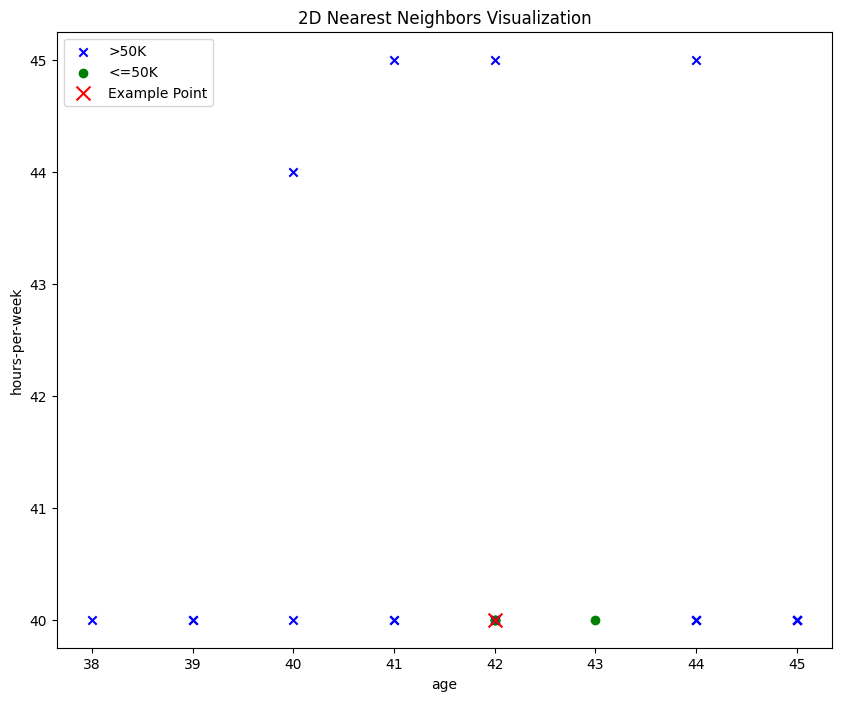

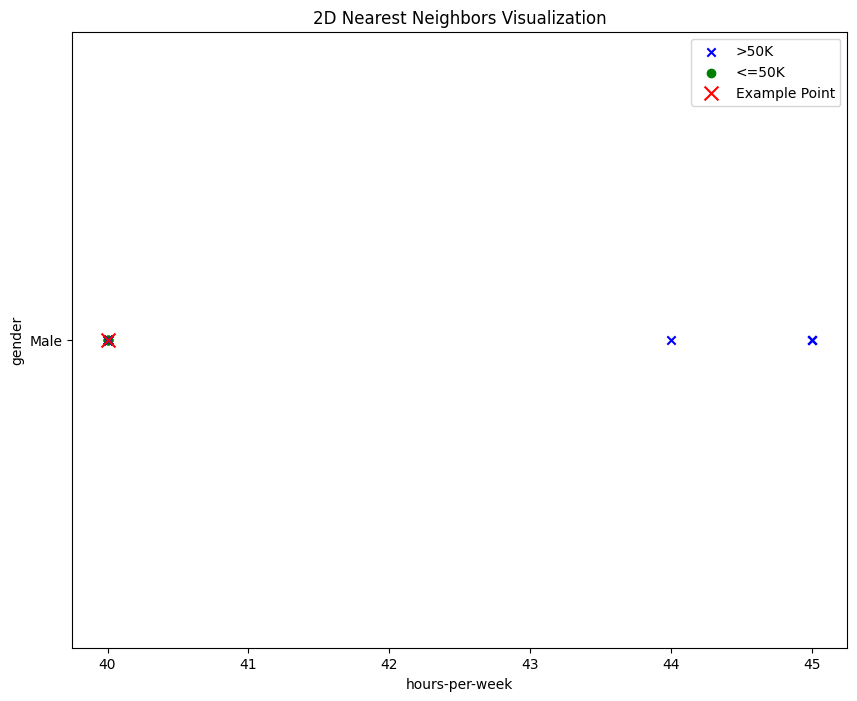

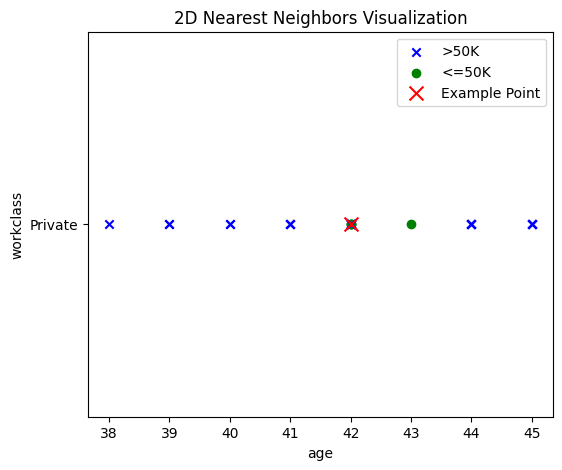

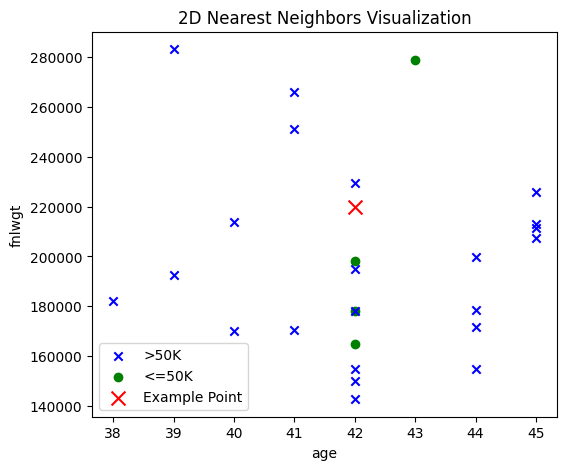

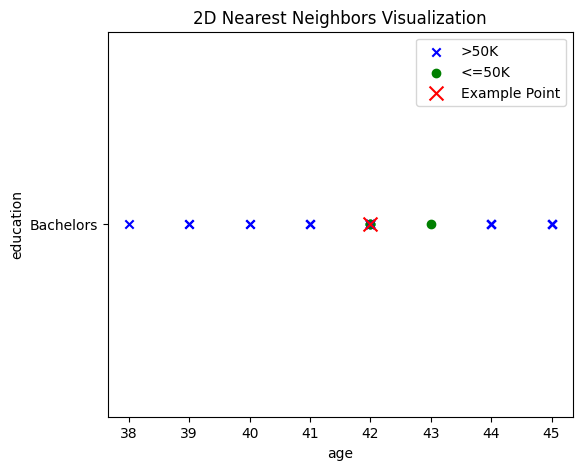

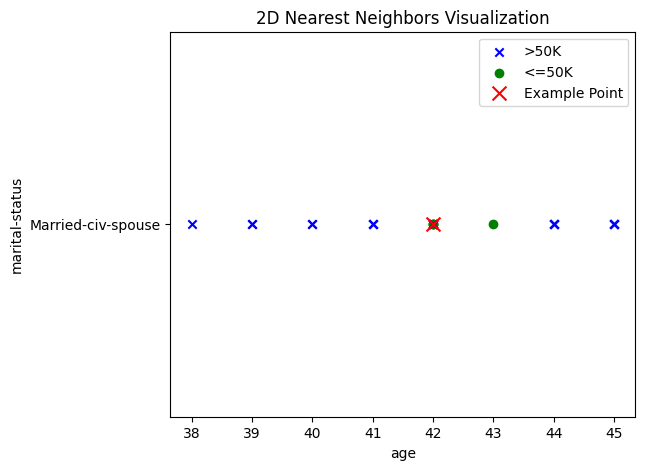

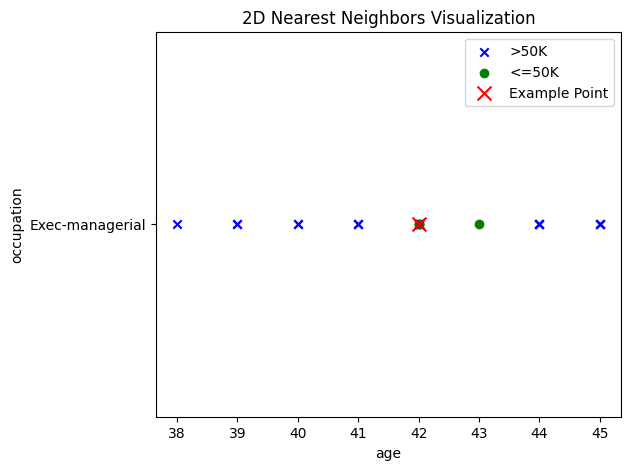

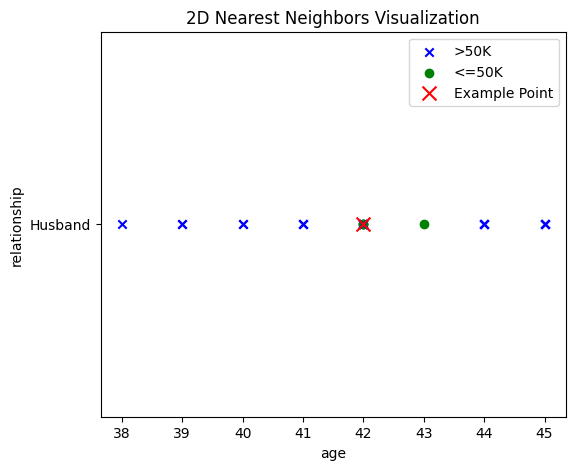

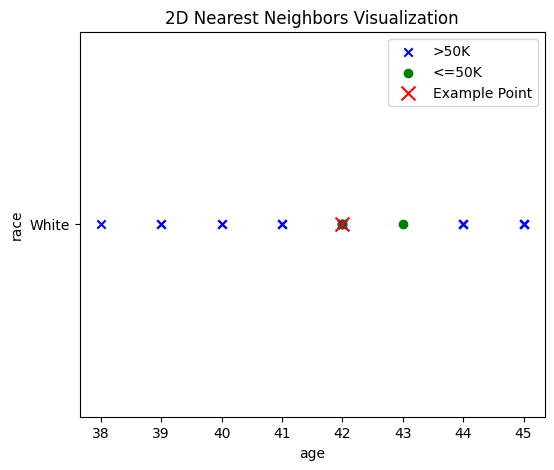

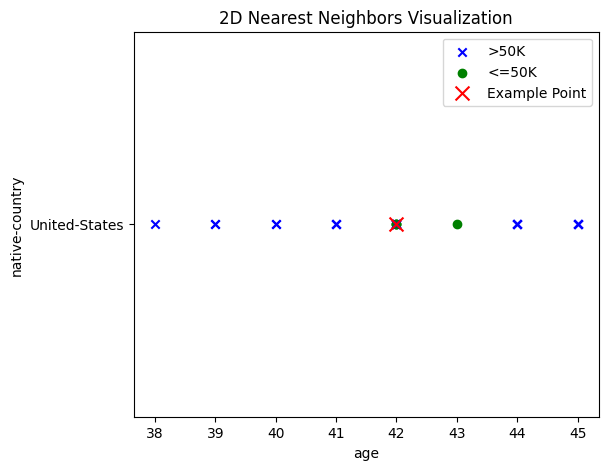

In [ ]:
def plot_nearest_neighbors_2d(dataframe, example_point, prediction, x_axis, y_axis, big: bool = False):
    plt.figure(figsize=(10, 8) if big else (6, 5))

    # Plot nearest neighbors with different markers based on income
    for _, row in dataframe.iterrows():
        if row['income'] == '>50K':
            plt.scatter(row[x_axis], row[y_axis], color='blue', marker='x', label='>50K' if '>50K' not in plt.gca().get_legend_handles_labels()[1] else "")
        else:
            plt.scatter(row[x_axis], row[y_axis], color='green', marker='o', label='<=50K' if '<=50K' not in plt.gca().get_legend_handles_labels()[1] else "")

    # Highlight the example point
    if prediction:
        plt.scatter(example_point[x_axis], example_point[y_axis], color='red', marker='x', label='Example Point', s=100)
    else:
        plt.scatter(example_point[x_axis], example_point[y_axis], color='red', label='Example Point', s=100)

    # Add labels and legend
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title('2D Nearest Neighbors Visualization')
    plt.legend()
    plt.show()

# Example point for prediction
example_point = pd.DataFrame(example_point)
for column, mapping in mappings.items():
    example_point[column] = example_point[column].apply(lambda x: mapping.get(x, f"Unknown ({x})"))
    
# Plotting the nearest neighbors
plot_nearest_neighbors_2d(nearest_neighbors_df, example_point.iloc[0], prediction, 'age', 'hours-per-week', big=True)
plot_nearest_neighbors_2d(nearest_neighbors_df, example_point.iloc[0], prediction, 'hours-per-week', 'gender', big=True)
plot_nearest_neighbors_2d(nearest_neighbors_df, example_point.iloc[0], prediction, 'age', 'workclass')
plot_nearest_neighbors_2d(nearest_neighbors_df, example_point.iloc[0], prediction, 'age', 'fnlwgt')
plot_nearest_neighbors_2d(nearest_neighbors_df, example_point.iloc[0], prediction, 'age', 'education')
plot_nearest_neighbors_2d(nearest_neighbors_df, example_point.iloc[0], prediction, 'age', 'marital-status')
plot_nearest_neighbors_2d(nearest_neighbors_df, example_point.iloc[0], prediction, 'age', 'occupation')
plot_nearest_neighbors_2d(nearest_neighbors_df, example_point.iloc[0], prediction, 'age', 'relationship')
plot_nearest_neighbors_2d(nearest_neighbors_df, example_point.iloc[0], prediction, 'age', 'race')
plot_nearest_neighbors_2d(nearest_neighbors_df, example_point.iloc[0], prediction, 'age', 'native-country')

dftest = st.inverse_transform(X_test)  # Rücktransformation der Merkmale
dftest = np.round(dftest).astype(int)
dftest = pd.DataFrame(dftest, columns=X.columns)
for column, mapping in mappings.items():
    dftest[column] = dftest[column].apply(lambda x: mapping.get(x, f"Unknown ({x})"))
dftest['income'] = y_test
dftest['income'] = dftest['income'].apply(lambda x: '>50K' if x == 1 else '<=50K')
plot_nearest_neighbors_2d(dftest, example_point.iloc[0], prediction, 'age', 'hours-per-week', big=True)


# Partial Dependence Plots

[0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65]
[15.7 20.6 25.5 30.4 35.3 40.2 45.1 50.  54.9 59.8 64.7]


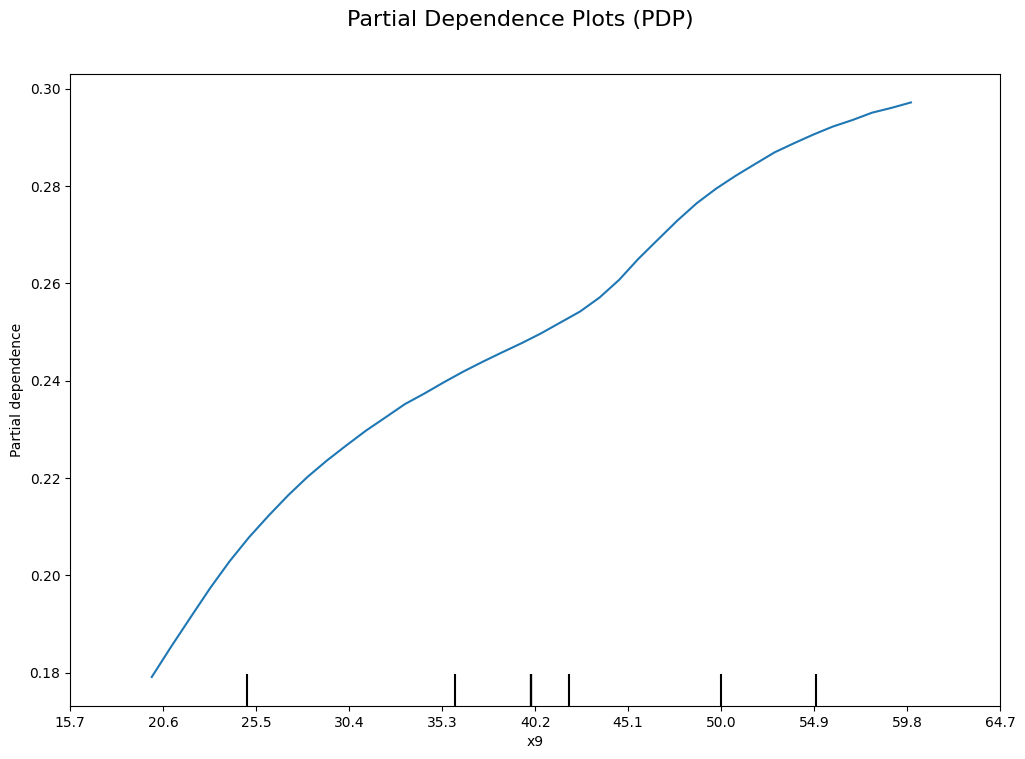

In [111]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# -----------------------------------------------
# Auswahl des Features für die Partielle Abhängigkeit
# -----------------------------------------------
# Das Modell wurde auf einem Datensatz mit mehreren Features trainiert.
# Hier soll die partielle Abhängigkeit nur für das Feature an Index 9 (z. B. 'hours-per-week') betrachtet werden.
features = [9]

# -----------------------------------------------
# Skalierungsparameter des ausgewählten Features
# -----------------------------------------------
# Das Modell wurde auf einem MinMax-skalierten Datensatz trainiert.
# Um die originalen (unskalierten) Werte später korrekt auf der x-Achse darzustellen,
# werden hier die Skalierungsparameter des MinMaxScalers für dieses Feature extrahiert.
scale_factor = st.scale_[9]  # Skalenfaktor des Features (max - min)
shift = st.min_[9]           # Minimumswert des Features im Trainingsdatensatz

# -----------------------------------------------
# Erstellen der Partial Dependence Plot-Darstellung
# -----------------------------------------------
# Mit `from_estimator` wird ein PDP direkt aus einem bereits trainierten Modell erzeugt.
# - `model`: das trainierte Klassifikationsmodell
# - `X_train`: die Trainingsdaten (skaliert!)
# - `features`: Liste der interessierenden Feature-Indizes
# - `grid_resolution`: Anzahl der Punkte, an denen das Feature variiert wird
# - `ax`: eine Matplotlib-Achse, um mehr Kontrolle über das Plot-Layout zu haben
fig, ax = plt.subplots(figsize=(12, 8))  # Größere Plotfläche für bessere Lesbarkeit
pdp = PartialDependenceDisplay.from_estimator(model, X_train, features, ax=ax, grid_resolution=40)

# -----------------------------------------------
# Zugriff auf die tatsächliche Achse der PDP-Anzeige
# -----------------------------------------------
# PartialDependenceDisplay verwaltet intern ein Raster von Achsenobjekten.
# Hier greifen wir direkt auf die relevante Achse (Zeile 0, Spalte 0) zu,
# um z. B. die Achsenbeschriftungen manuell anzupassen.
actual_ax = pdp.axes_[0, 0]

# -----------------------------------------------
# Rücktransformation der x-Achse auf Originalwerte
# -----------------------------------------------
# Da der PDP intern mit den skalierten Featurewerten arbeitet,
# würde die x-Achse sonst uninterpretierbare Werte wie 0.23 oder 0.81 zeigen.
# Um die Achse verständlich zu machen, werden die xticks (Skalenwerte der x-Achse)
# mit der Inversen der MinMax-Skalierung zurücktransformiert:
#   x_original = (x_scaled - min) / scale
xticks = actual_ax.get_xticks()  # Aktuelle Tick-Positionen (skaliert)
xticks_rescaled = (xticks - shift) / scale_factor  # Rückskalierung

# Ausgabe der Werte zur Überprüfung (Debugging-Zwecke)
print(xticks)
print(xticks_rescaled)

# Setzen der zurückskalierten Tick-Labels auf der x-Achse
# So wird sichergestellt, dass die Achse reale Werte wie z. B. Alter in Jahren zeigt.
actual_ax.set_xticks(xticks)
actual_ax.set_xticklabels([f"{tick:.1f}" for tick in xticks_rescaled])

# -----------------------------------------------
# Plot-Anpassungen und Darstellung
# -----------------------------------------------
# Titel hinzufügen für besseren Kontext im Diagramm
plt.suptitle("Partial Dependence Plots (PDP)", fontsize=16)

# Verhindert, dass der Titel mit dem Plot überlappt
plt.subplots_adjust(top=0.9)

# Anzeige des Plots
plt.show()

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7]
[17.  24.3 31.6 38.9 46.2 53.5 60.8 68.1]


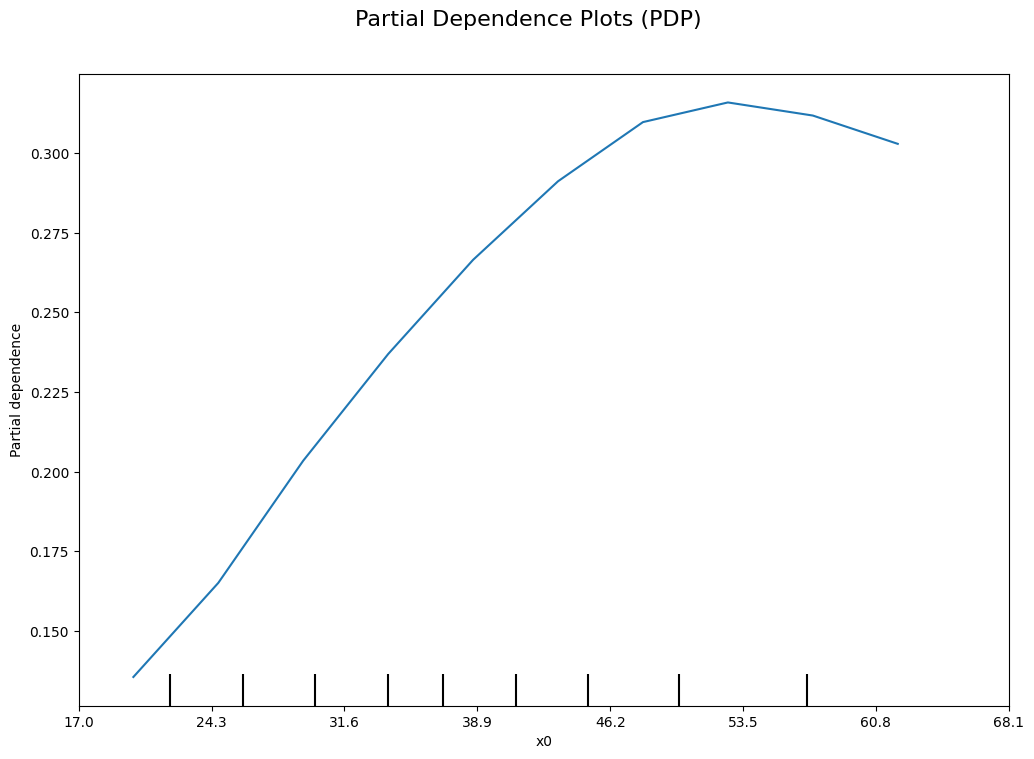

In [112]:
# Features for which you want to create the PDPs (e.g., 'age')
features = [0]  # Example: 'age' is the first feature
scale_factor = st.scale_[0]
shift = st.min_[0]

# Create the PDPs
fig, ax = plt.subplots(figsize=(12, 8))  # Optional: Larger display for clarity
pdp = PartialDependenceDisplay.from_estimator(model, X_train, features, ax=ax, grid_resolution=10)



actual_ax = pdp.axes_[0, 0]

#Adjust x-axis labels
xticks = actual_ax.get_xticks()
xticks_rescaled = (xticks - shift) / scale_factor  # Rescale back to original values
print(xticks)
print(xticks_rescaled)
actual_ax.set_xticks(xticks)
actual_ax.set_xticklabels([f"{tick:.1f}" for tick in xticks_rescaled])

# Add title
plt.suptitle("Partial Dependence Plots (PDP)", fontsize=16)
plt.subplots_adjust(top=0.9)  # Avoid title overlap

plt.show()

In [ ]:
# Features for which you want to create the PDPs (e.g., 'age')
for i in range(0,11):
    print(example_point.columns[i])
    features = [i]  # Example: 'age' is the first feature
    scale_factor = st.scale_[i]
    shift = st.min_[i]

        # Create the PDPs
    fig, ax = plt.subplots(figsize=(12, 8))  # Optional: Larger display for clarity
    pdp = PartialDependenceDisplay.from_estimator(model, X_train, features, ax=ax, grid_resolution=10)



    actual_ax = pdp.axes_[0, 0]

    #Adjust x-axis labels
    xticks = actual_ax.get_xticks()
    xticks_rescaled = (xticks - shift) / scale_factor  # Rescale back to original values
    print(xticks)
    print(xticks_rescaled)
    actual_ax.set_xticks(xticks)
    actual_ax.set_xticklabels([f"{tick:.1f}" for tick in xticks_rescaled])

    # Add title
    plt.suptitle("Partial Dependence Plots (PDP)", fontsize=16)
    plt.subplots_adjust(top=0.9)  # Avoid title overlap

    plt.show()

age
